#**IMPORTING THE REQUIRED LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import preprocessing
import re
import random
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#**IMPORTING THE DATASET**

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [3]:
!kaggle datasets download -d sobhanmoosavi/us-accidents

 99% 265M/269M [00:02<00:00, 123MB/s]
100% 269M/269M [00:02<00:00, 104MB/s]


In [4]:
!unzip \*.zip && rm *.zip

Archive:  us-accidents.zip
  inflating: US_Accidents_Dec21_updated.csv  


In [67]:
data = pd.read_csv('/content/US_Accidents_Dec21_updated.csv')
data

ID  Severity           Start_Time             End_Time  \
0              A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08   
1              A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20   
2              A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39   
3              A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45   
4              A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43   
...            ...       ...                  ...                  ...   
2845337  A-2845338         2  2019-08-23 18:03:25  2019-08-23 18:32:01   
2845338  A-2845339         2  2019-08-23 19:11:30  2019-08-23 19:38:23   
2845339  A-2845340         2  2019-08-23 19:00:21  2019-08-23 19:28:49   
2845340  A-2845341         2  2019-08-23 19:00:21  2019-08-23 19:29:42   
2845341  A-2845342         2  2019-08-23 18:52:06  2019-08-23 19:21:31   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0        40.108910  -83.092860  40.112060  -83.031870         3.230   
1        39.865420  -84.062800  39.865010  -84.048730         0.747   
2        39.102660  -84.524680  39.102090  -84.523960         0.055   
3        41.062130  -81.537840  41.062170  -81.535470         0.123   
4        39.172393  -84.492792  39.170476  -84.501798         0.500   
...            ...         ...        ...         ...           ...   
2845337  34.002480 -117.379360  33.998880 -117.370940         0.543   
2845338  32.766960 -117.148060  32.765550 -117.153630         0.338   
2845339  33.775450 -117.847790  33.777400 -117.857270         0.561   
2845340  33.992460 -118.403020  33.983110 -118.395650         0.772   
2845341  34.133930 -117.230920  34.137360 -117.239340         0.537   

                                               Description  ...  Roundabout  \
0        Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   
1                       At OH-4/OH-235/Exit 41 - Accident.  ...       False   
2                         At I-71/US-50/Exit 1 - Accident.  ...       False   
3                          At Dart Ave/Exit 21 - Accident.  ...       False   
4                       At Mitchell Ave/Exit 6 - Accident.  ...       False   
...                                                    ...  ...         ...   
2845337                           At Market St - Accident.  ...       False   
2845338    At Camino Del Rio/Mission Center Rd - Accident.  ...       False   
2845339  At Glassell St/Grand Ave - Accident. in the ri...  ...       False   
2845340     At CA-90/Marina Fwy/Jefferson Blvd - Accident.  ...       False   
2845341              At Highland Ave/Arden Ave - Accident.  ...       False   

        Station   Stop Traffic_Calming Traffic_Signal Turning_Loop  \
0         False  False           False          False        False   
1         False  False           False          False        False   
2         False  False           False          False        False   
3         False  False           False          False        False   
4         False  False           False          False        False   
...         ...    ...             ...            ...          ...   
2845337   False  False           False          False        False   
2845338   False  False           False          False        False   
2845339   False  False           False          False        False   
2845340   False  False           False          False        False   
2845341   False  False           False          False        False   

        Sunrise_Sunset Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0                Night          Night             Night                 Night  
1                Night          Night             Night                 Night  
2                Night          Night             Night                   Day  
3                Night          Night               Day                   Day  
4                  Day            Day               Day                   Day  
... 

#**SHAPE OF OUR DATA**

In [ ]:
print("the shape of the data is",data.shape)
print("The no of columns in the dataset are : " ,data.shape[1])
print("The no of datapoints in the datset are :", data.shape[0])

the shape of the data is (2845342, 47)
The no of columns in the dataset are :  47
The no of datapoints in the datset are : 2845342


#**MATRIX ABOUT MISSING INFORMATION**

<Axes: >

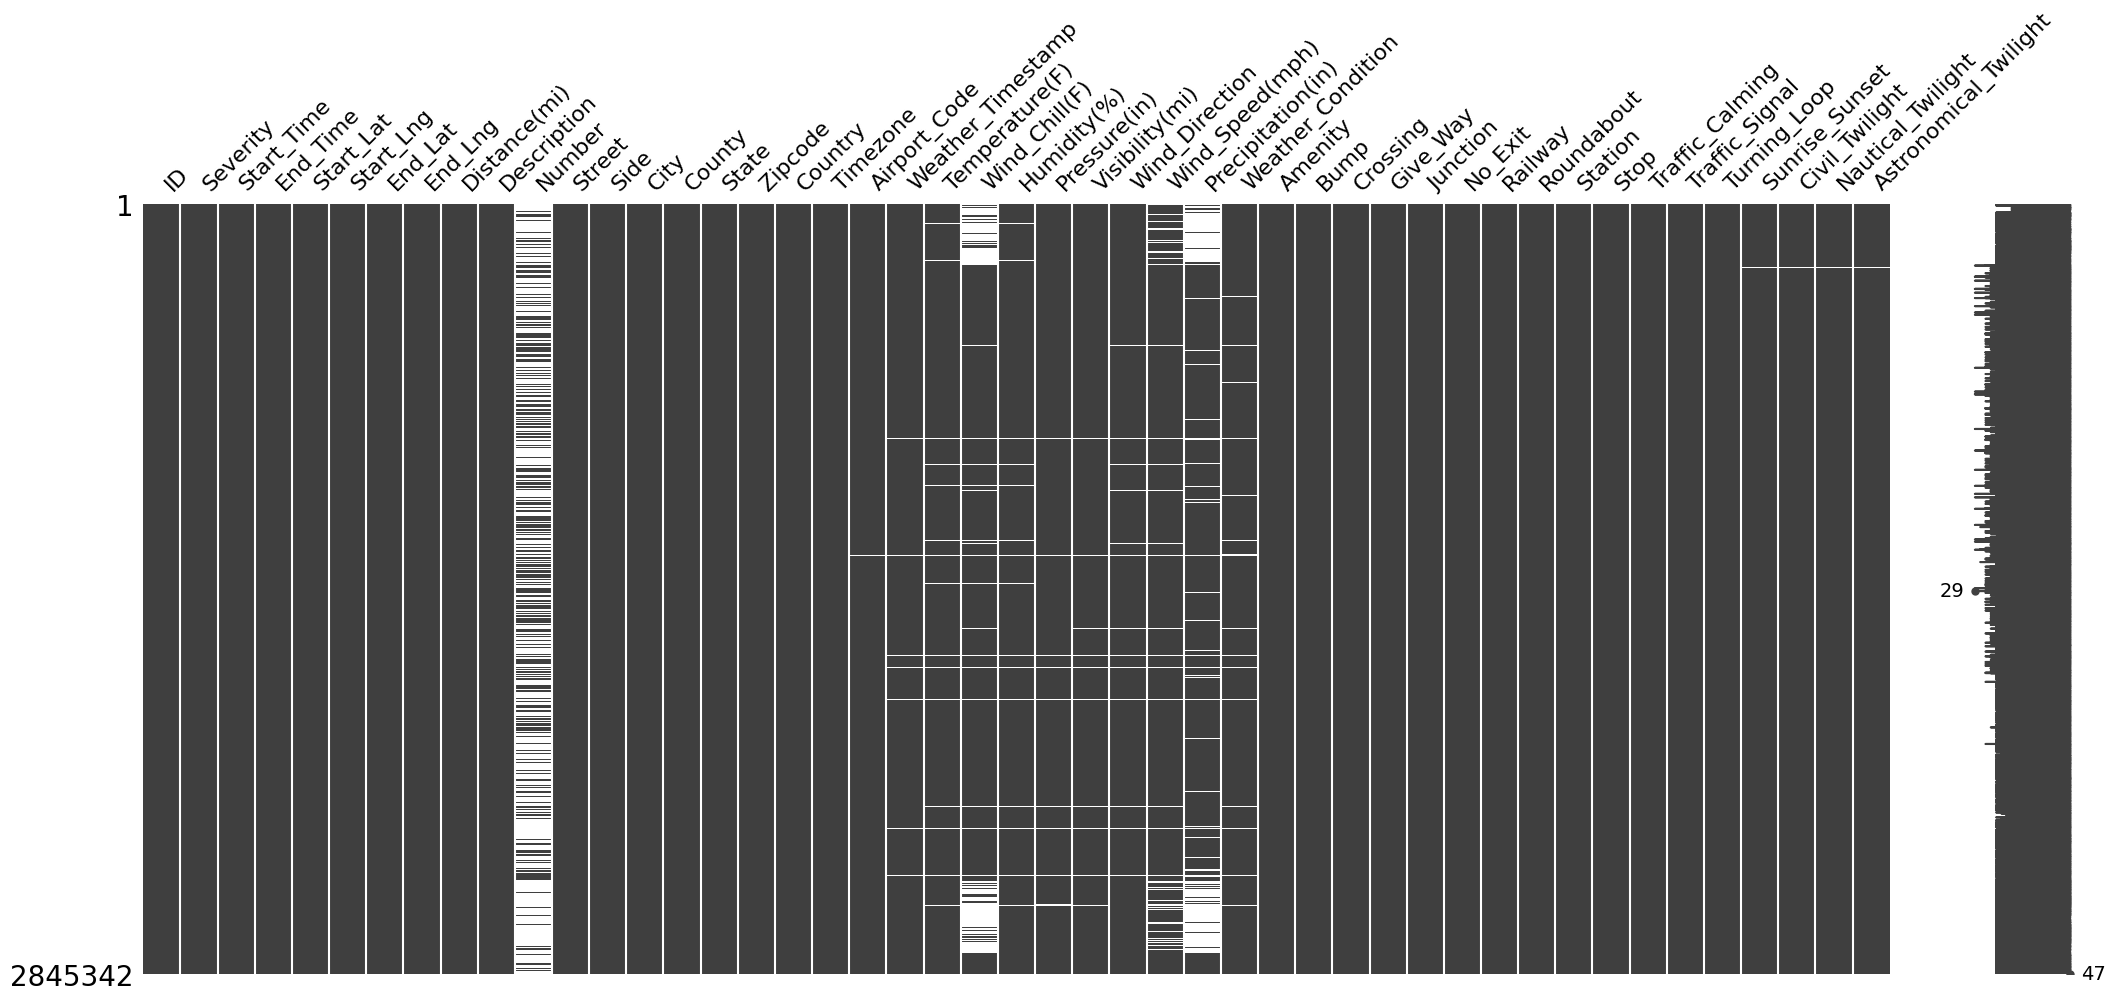

In [ ]:
msno.matrix(data)

#**INFORMATION ABOUT OUR DATASET**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
data.describe()

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  2.845342e+06  2.845342e+06  2.845342e+06  2.845342e+06  2.845342e+06   
mean   2.137572e+00  3.624520e+01 -9.711463e+01  3.624532e+01 -9.711439e+01   
std    4.787216e-01  5.363797e+00  1.831782e+01  5.363873e+00  1.831763e+01   
min    1.000000e+00  2.456603e+01 -1.245481e+02  2.456601e+01 -1.245457e+02   
25%    2.000000e+00  3.344517e+01 -1.180331e+02  3.344628e+01 -1.180333e+02   
50%    2.000000e+00  3.609861e+01 -9.241808e+01  3.609799e+01 -9.241772e+01   
75%    2.000000e+00  4.016024e+01 -8.037243e+01  4.016105e+01 -8.037338e+01   
max    4.000000e+00  4.900058e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)        Number  Temperature(F)  Wind_Chill(F)  \
count  2.845342e+06  1.101431e+06    2.776068e+06   2.375699e+06   
mean   7.026779e-01  8.089408e+03    6.179356e+01   5.965823e+01   
std    1.560361e+00  1.836009e+04    1.862263e+01   2.116097e+01   
min    0.000000e+00  0.000000e+00   -8.900000e+01  -8.900000e+01   
25%    5.200000e-02  1.270000e+03    5.000000e+01   4.600000e+01   
50%    2.440000e-01  4.007000e+03    6.400000e+01   6.300000e+01   
75%    7.640000e-01  9.567000e+03    7.600000e+01   7.600000e+01   
max    1.551860e+02  9.999997e+06    1.960000e+02   1.960000e+02   

        Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count  2.772250e+06  2.786142e+06    2.774796e+06     2.687398e+06   
mean   6.436545e+01  2.947234e+01    9.099391e+00     7.395044e+00   
std    2.287457e+01  1.045286e+00    2.717546e+00     5.527454e+00   
min    1.000000e+00  0.000000e+00    0.000000e+00     0.000000e+00   
25%    4.800000e+01  2.931000e+01    1.000000e+01     3.500000e+00   
50%    6.700000e+01  2.982000e+01    1.000000e+01     7.000000e+00   
75%    8.300000e+01  3.001000e+01    1.000000e+01     1.000000e+01   
max    1.000000e+02  5.890000e+01    1.400000e+02     1.087000e+03   

       Precipitation(in)  
count       2.295884e+06  
mean        7.016940e-03  
std         9.348831e-02  
min         0.000000e+00  
25%         0.000000e+00  
50%         0.000000e+00  
75%         0.000000e+00  
max         2.400000e+01

In [ ]:
data.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

#**PRINTING THE NAMES OF THE COLUMNS**

In [ ]:
for i in data:
  print(i)

ID
Severity
Start_Time
End_Time
Start_Lat
Start_Lng
End_Lat
End_Lng
Distance(mi)
Description
Number
Street
Side
City
County
State
Zipcode
Country
Timezone
Airport_Code
Weather_Timestamp
Temperature(F)
Wind_Chill(F)
Humidity(%)
Pressure(in)
Visibility(mi)
Wind_Direction
Wind_Speed(mph)
Precipitation(in)
Weather_Condition
Amenity
Bump
Crossing
Give_Way
Junction
No_Exit
Railway
Roundabout
Station
Stop
Traffic_Calming
Traffic_Signal
Turning_Loop
Sunrise_Sunset
Civil_Twilight
Nautical_Twilight
Astronomical_Twilight


#**PRINTING UNIQUE VALUES IN THE COLUMNS**

In [ ]:
print(data['Severity'].value_counts(),"are the unique values in  the Severity column")

2    2532991
3     155105
4     131193
1      26053
Name: Severity, dtype: int64 are the unique values in  the Severity column


In [ ]:
print(data['Distance(mi)'].value_counts(),"are the unique values in the Distance column")

0.000     385441
0.008       9262
0.009       8978
0.010       8737
0.007       7846
           ...  
11.026         1
11.346         1
17.175         1
18.984         1
36.350         1
Name: Distance(mi), Length: 14165, dtype: int64 are the unique values in the Distance column


In [ ]:
print(data['Description'].value_counts(),"are the unique values in the Description column")

A crash has occurred causing no to minimum delays. Use caution.                                                                      7978
A crash has occurred use caution.                                                                                                    2531
An unconfirmed report of a crash has been received. Use caution.                                                                     2308
Hazardous debris is causing no to minimum delays. Use caution.                                                                       2095
At I-15 - Accident.                                                                                                                  2070
                                                                                                                                     ... 
I-895 SOUTH PAST EXIT 12 E LOMBARD ST (SB) (MM 10.6)                                                                                    1
Incident on SW 136TH ST SB near SW

In [ ]:
print(data['Street'].value_counts(),"are the unique values in  the Street column")

I-95 N               39853
I-5 N                39402
I-95 S               36425
I-5 S                30229
I-10 E               26164
                     ...  
 Villareal Dr            1
 La Jacaranda            1
 SW 273rd Ln             1
 Silent Brook Dr         1
473-401 Cutoff Rd        1
Name: Street, Length: 159651, dtype: int64 are the unique values in  the Street column


In [ ]:
print(data['City'].value_counts(),"are the unique values in the City column")

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64 are the unique values in the City column


In [ ]:
print(data['County'].value_counts(),"are the unique values in the County column")

Los Angeles            234122
Miami-Dade             143939
Orange                 114917
San Bernardino          55018
Dallas                  50050
                        ...  
Kearney                     1
Matagorda                   1
Oglala Lakota               1
St John The Baptist         1
Ness                        1
Name: County, Length: 1707, dtype: int64 are the unique values in the County column


In [ ]:
print(data['State'].value_counts(),"are the unique values in the State column","Length: ",len(data['State'].unique()))

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
NY    108049
PA     99975
MN     97185
NC     91362
SC     89216
MD     65085
AZ     56504
NJ     52902
TN     52613
UT     49193
LA     47232
IL     47105
MI     43843
GA     40086
WA     32554
CT     29762
MO     29633
CO     25340
OH     24409
IN     20850
AL     19322
MT     15964
AR     10935
IA      9607
DC      9133
KS      9033
OK      8806
ID      8544
WI      7896
WV      7632
KY      6638
MA      6392
NV      6197
MS      5320
DE      4842
RI      4451
NH      3866
NE      3320
NM      2370
ND      2258
ME      2193
WY       990
VT       365
SD       201
Name: State, dtype: int64 are the unique values in the State column Length:  49


In [ ]:
print(data['Airport_Code'].value_counts(),"are the unique values in the Airport_Code column")

KCQT    52790
KMIA    45740
KORL    39380
KOPF    38556
KTMB    36250
        ...  
KHDO        1
KAXO        1
KPAT        1
KIEN        1
KICR        1
Name: Airport_Code, Length: 2004, dtype: int64 are the unique values in the Airport_Code column


#**PREPROCESSING FOR EDA**

In [ ]:
data_1 = data.drop(['ID'], axis=1)
data_1

Severity           Start_Time             End_Time  Start_Lat  \
0               3  2016-02-08 00:37:08  2016-02-08 06:37:08  40.108910   
1               2  2016-02-08 05:56:20  2016-02-08 11:56:20  39.865420   
2               2  2016-02-08 06:15:39  2016-02-08 12:15:39  39.102660   
3               2  2016-02-08 06:51:45  2016-02-08 12:51:45  41.062130   
4               3  2016-02-08 07:53:43  2016-02-08 13:53:43  39.172393   
...           ...                  ...                  ...        ...   
2845337         2  2019-08-23 18:03:25  2019-08-23 18:32:01  34.002480   
2845338         2  2019-08-23 19:11:30  2019-08-23 19:38:23  32.766960   
2845339         2  2019-08-23 19:00:21  2019-08-23 19:28:49  33.775450   
2845340         2  2019-08-23 19:00:21  2019-08-23 19:29:42  33.992460   
2845341         2  2019-08-23 18:52:06  2019-08-23 19:21:31  34.133930   

          Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0        -83.092860  40.112060  -83.031870         3.230   
1        -84.062800  39.865010  -84.048730         0.747   
2        -84.524680  39.102090  -84.523960         0.055   
3        -81.537840  41.062170  -81.535470         0.123   
4        -84.492792  39.170476  -84.501798         0.500   
...             ...        ...         ...           ...   
2845337 -117.379360  33.998880 -117.370940         0.543   
2845338 -117.148060  32.765550 -117.153630         0.338   
2845339 -117.847790  33.777400 -117.857270         0.561   
2845340 -118.403020  33.983110 -118.395650         0.772   
2845341 -117.230920  34.137360 -117.239340         0.537   

                                               Description  Number  ...  \
0        Between Sawmill Rd/Exit 20 and OH-315/Olentang...     NaN  ...   
1                       At OH-4/OH-235/Exit 41 - Accident.     NaN  ...   
2                         At I-71/US-50/Exit 1 - Accident.     NaN  ...   
3                          At Dart Ave/Exit 21 - Accident.     NaN  ...   
4                       At Mitchell Ave/Exit 6 - Accident.     NaN  ...   
...                                                    ...     ...  ...   
2845337                           At Market St - Accident.     NaN  ...   
2845338    At Camino Del Rio/Mission Center Rd - Accident.     NaN  ...   
2845339  At Glassell St/Grand Ave - Accident. in the ri...     NaN  ...   
2845340     At CA-90/Marina Fwy/Jefferson Blvd - Accident.     NaN  ...   
2845341              At Highland Ave/Arden Ave - Accident.     NaN  ...   

        Roundabout Station   Stop Traffic_Calming Traffic_Signal Turning_Loop  \
0            False   False  False           False          False        False   
1            False   False  False           False          False        False   
2            False   False  False           False          False        False   
3            False   False  False           False          False        False   
4            False   False  False           False          False        False   
...            ...     ...    ...             ...            ...          ...   
2845337      False   False  False           False          False        False   
2845338      False   False  False           False          False        False   
2845339      False   False  False           False          False        False   
2845340      False   False  False           False          False        False   
2845341      False   False  False           False          False        False   

        Sunrise_Sunset Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0                Night          Night             Night                 Night  
1                Night          Night             Night                 Night  
2                Night          Night             Night                   Day  
3                Night          Night               Day                   Day  
4                  Day            Day               Day                   Day  
...                ...            ...        

In [ ]:
missing_percentage = []
for i in data_1:
  missing_value = (data_1[i].isna().sum() / data_1.shape[0]) * 100
  missing_percentage.append(missing_value)
  print("The missing values in the ",i,"named column with",missing_value,"%")

The missing values in the  Severity named column with 0.0 %
The missing values in the  Start_Time named column with 0.0 %
The missing values in the  End_Time named column with 0.0 %
The missing values in the  Start_Lat named column with 0.0 %
The missing values in the  Start_Lng named column with 0.0 %
The missing values in the  End_Lat named column with 0.0 %
The missing values in the  End_Lng named column with 0.0 %
The missing values in the  Distance(mi) named column with 0.0 %
The missing values in the  Description named column with 0.0 %
The missing values in the  Number named column with 61.290031215931165 %
The missing values in the  Street named column with 7.029032010914681e-05 %
The missing values in the  Side named column with 0.0 %
The missing values in the  City named column with 0.0048148869274765565 %
The missing values in the  County named column with 0.0 %
The missing values in the  State named column with 0.0 %
The missing values in the  Zipcode named column with 0.04

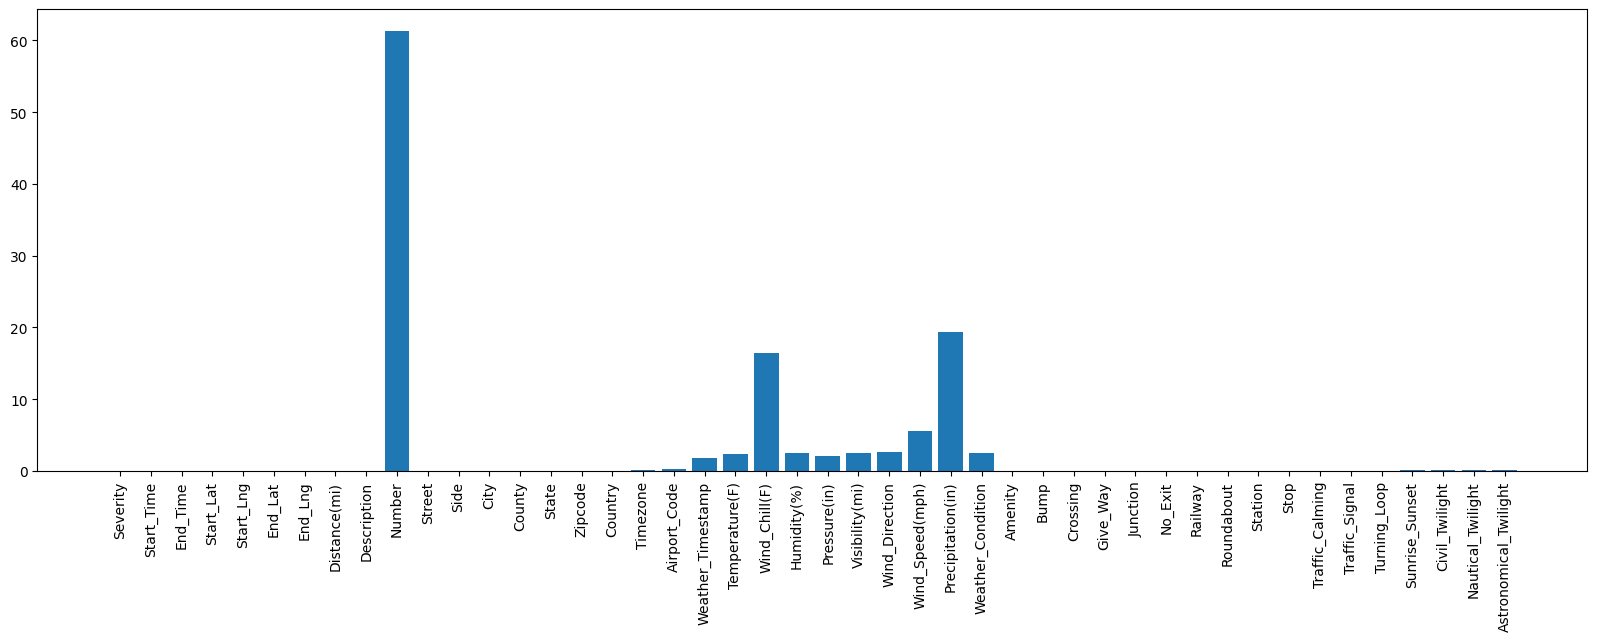

In [ ]:
label = [i for i in data_1]
fig, ax = plt.subplots(figsize=(20,6))
ax.bar(label, missing_percentage)
ax.set_xticklabels(label, rotation=90)
plt.show()

In [ ]:
#we see that Nummber,Wind_chill and Precipitation have more than 10% of missing values do we will drop them so that they donot cause any problem while analysing the data
#we can also say that we don't need the data of end_lat and end_lng also because we care at the point of coliision only
#we can also drop the columns ofsunrise_sunset, civil_twilight, nautical_twilight, Astronomical_twlight
#sunrise_sunset data doesnot matter because the accident dataset clearly independent of time
#and the other three data is completely not useful
#Civil Twilight: Begins in the morning, or ends in the evening, when the geometric center of the sun is 6 degrees below the horizon.
#Nautical Twilight: Begins in the morning, or ends in the evening, when the geometric center of the sun is 12 degrees below the horizon.
#Astronomical Twilight: Begins in the morning, or ends in the evening, when the geometric center of the sun is 18 degrees below the horizon
# so we drop the above columns
#Time_zone column is clearly not necessaey because the accidents almost lie in the same region 
#Airport_Code is clearly a geographical characteristic so it not necessary
#As the whole dataset has only one country US so we can drop that column
#As we have the latitude and longitude data we can remove the addresses/Descriptive columns in the datasets
#We can remove Description that barely defines the way of the description reoprted by the first witeness so we won't depend on it completely
#We can drop all the weather related factors from our dataset as it doesnot affect the way fo occuring of Accidents
data_2 = data_1.drop(['Number','Wind_Chill(F)','Precipitation(in)','End_Lat','End_Lng','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight','Timezone','Airport_Code','Country','Street','Side','Zipcode','Weather_Timestamp','Temperature(F)','Visibility(mi)','Wind_Direction','Wind_Speed(mph)','Weather_Condition','Description','Humidity(%)','Pressure(in)'], axis = 1)
data_2

Severity           Start_Time             End_Time  Start_Lat  \
0               3  2016-02-08 00:37:08  2016-02-08 06:37:08  40.108910   
1               2  2016-02-08 05:56:20  2016-02-08 11:56:20  39.865420   
2               2  2016-02-08 06:15:39  2016-02-08 12:15:39  39.102660   
3               2  2016-02-08 06:51:45  2016-02-08 12:51:45  41.062130   
4               3  2016-02-08 07:53:43  2016-02-08 13:53:43  39.172393   
...           ...                  ...                  ...        ...   
2845337         2  2019-08-23 18:03:25  2019-08-23 18:32:01  34.002480   
2845338         2  2019-08-23 19:11:30  2019-08-23 19:38:23  32.766960   
2845339         2  2019-08-23 19:00:21  2019-08-23 19:28:49  33.775450   
2845340         2  2019-08-23 19:00:21  2019-08-23 19:29:42  33.992460   
2845341         2  2019-08-23 18:52:06  2019-08-23 19:21:31  34.133930   

          Start_Lng  Distance(mi)         City          County State  Amenity  \
0        -83.092860         3.230       Dublin        Franklin    OH    False   
1        -84.062800         0.747       Dayton      Montgomery    OH    False   
2        -84.524680         0.055   Cincinnati        Hamilton    OH    False   
3        -81.537840         0.123        Akron          Summit    OH    False   
4        -84.492792         0.500   Cincinnati        Hamilton    OH    False   
...             ...           ...          ...             ...   ...      ...   
2845337 -117.379360         0.543    Riverside       Riverside    CA    False   
2845338 -117.148060         0.338    San Diego       San Diego    CA    False   
2845339 -117.847790         0.561       Orange          Orange    CA    False   
2845340 -118.403020         0.772  Culver City     Los Angeles    CA    False   
2845341 -117.230920         0.537     Highland  San Bernardino    CA    False   

         ...  Give_Way  Junction  No_Exit  Railway  Roundabout  Station  \
0        ...     False     False    False    False       False    False   
1        ...     False     False    False    False       False    False   
2        ...     False      True    False    False       False    False   
3        ...     False     False    False    False       False    False   
4        ...     False     False    False    False       False    False   
...      ...       ...       ...      ...      ...         ...      ...   
2845337  ...     False     False    False    False       False    False   
2845338  ...     False     False    False    False       False    False   
2845339  ...     False      True    False    False       False    False   
2845340  ...     False     False    False    False       False    False   
2845341  ...     False     False    False    False       False    False   

          Stop  Traffic_Calming  Traffic_Signal  Turning_Loop  
0        False            False           False         False  
1        False            False           False         False  
2        False            False           False         False  
3        False            False           False         False  
4        False            False           False         False  
...        ...              ...             ...           ...  
2845337  False            False           False         False  
2845338  False            False           False         False  
2845339  False            False           False         False  
2845340  False            False           False         False  
2845341  False            False           False         False  

[2845342 rows x 22 columns]

#**CORRELATION MATRIX FOR OUR DATA FOR VISUALIZATION**

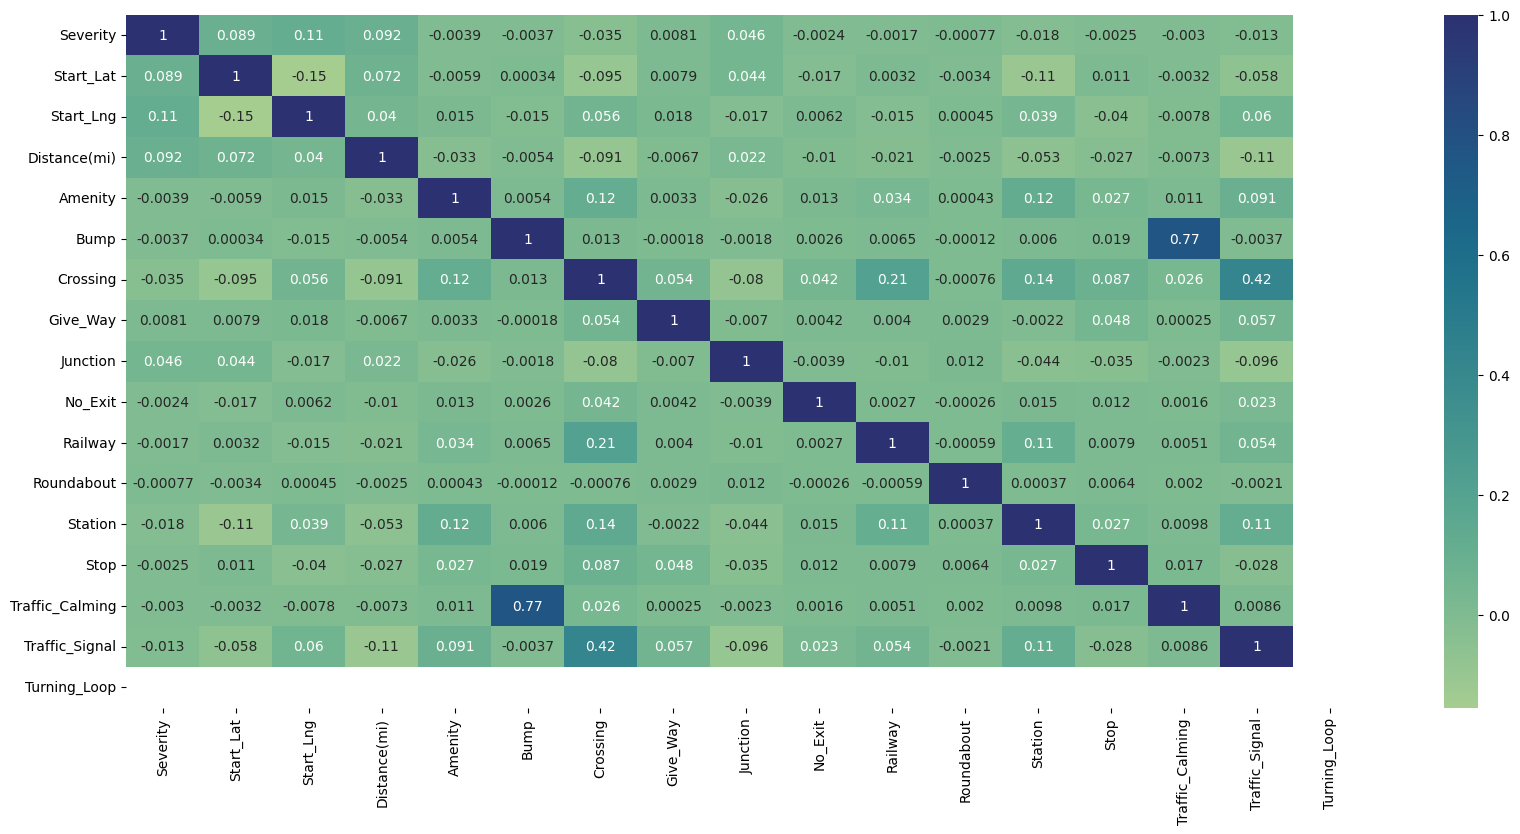

In [ ]:
#To understand our dataset lets us draw a heat map of the features
plt.figure(figsize = (20,9))
matrix = sns.heatmap(data_2.corr(), cmap="crest", annot = True)
plt.show()

#**EDA ON THE DATASET**

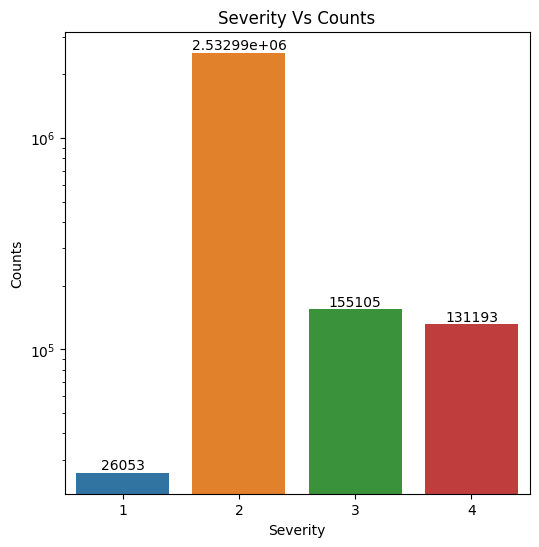

In [ ]:
plt.figure(figsize = (6,6))
X_4 = data_2['Severity'].value_counts().sort_values(ascending = False).reset_index()
Z_4 = sns.barplot(data = X_4, x = "index", y = "Severity")
Z_4.bar_label(Z_4.containers[0])
plt.yscale("log")
plt.xlabel('Severity')
plt.ylabel('Counts')
plt.title('Severity Vs Counts')
plt.show()

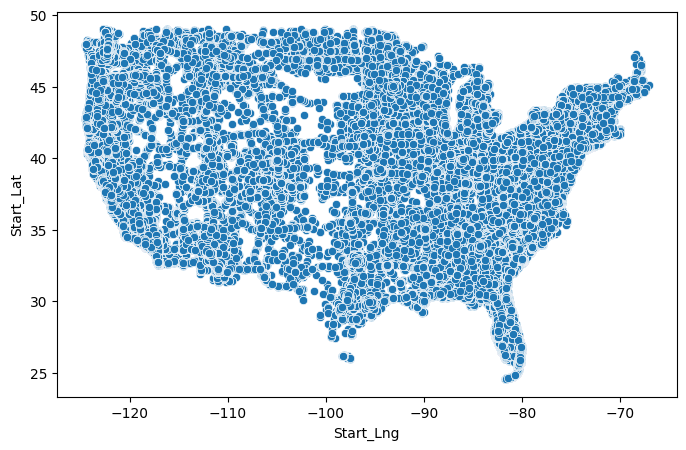

In [ ]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = data_2['Start_Lng'], y = data_2['Start_Lat'])
plt.show()

155.186  is the minimum value in the distance column
0.0  is the maximum value in the distance value


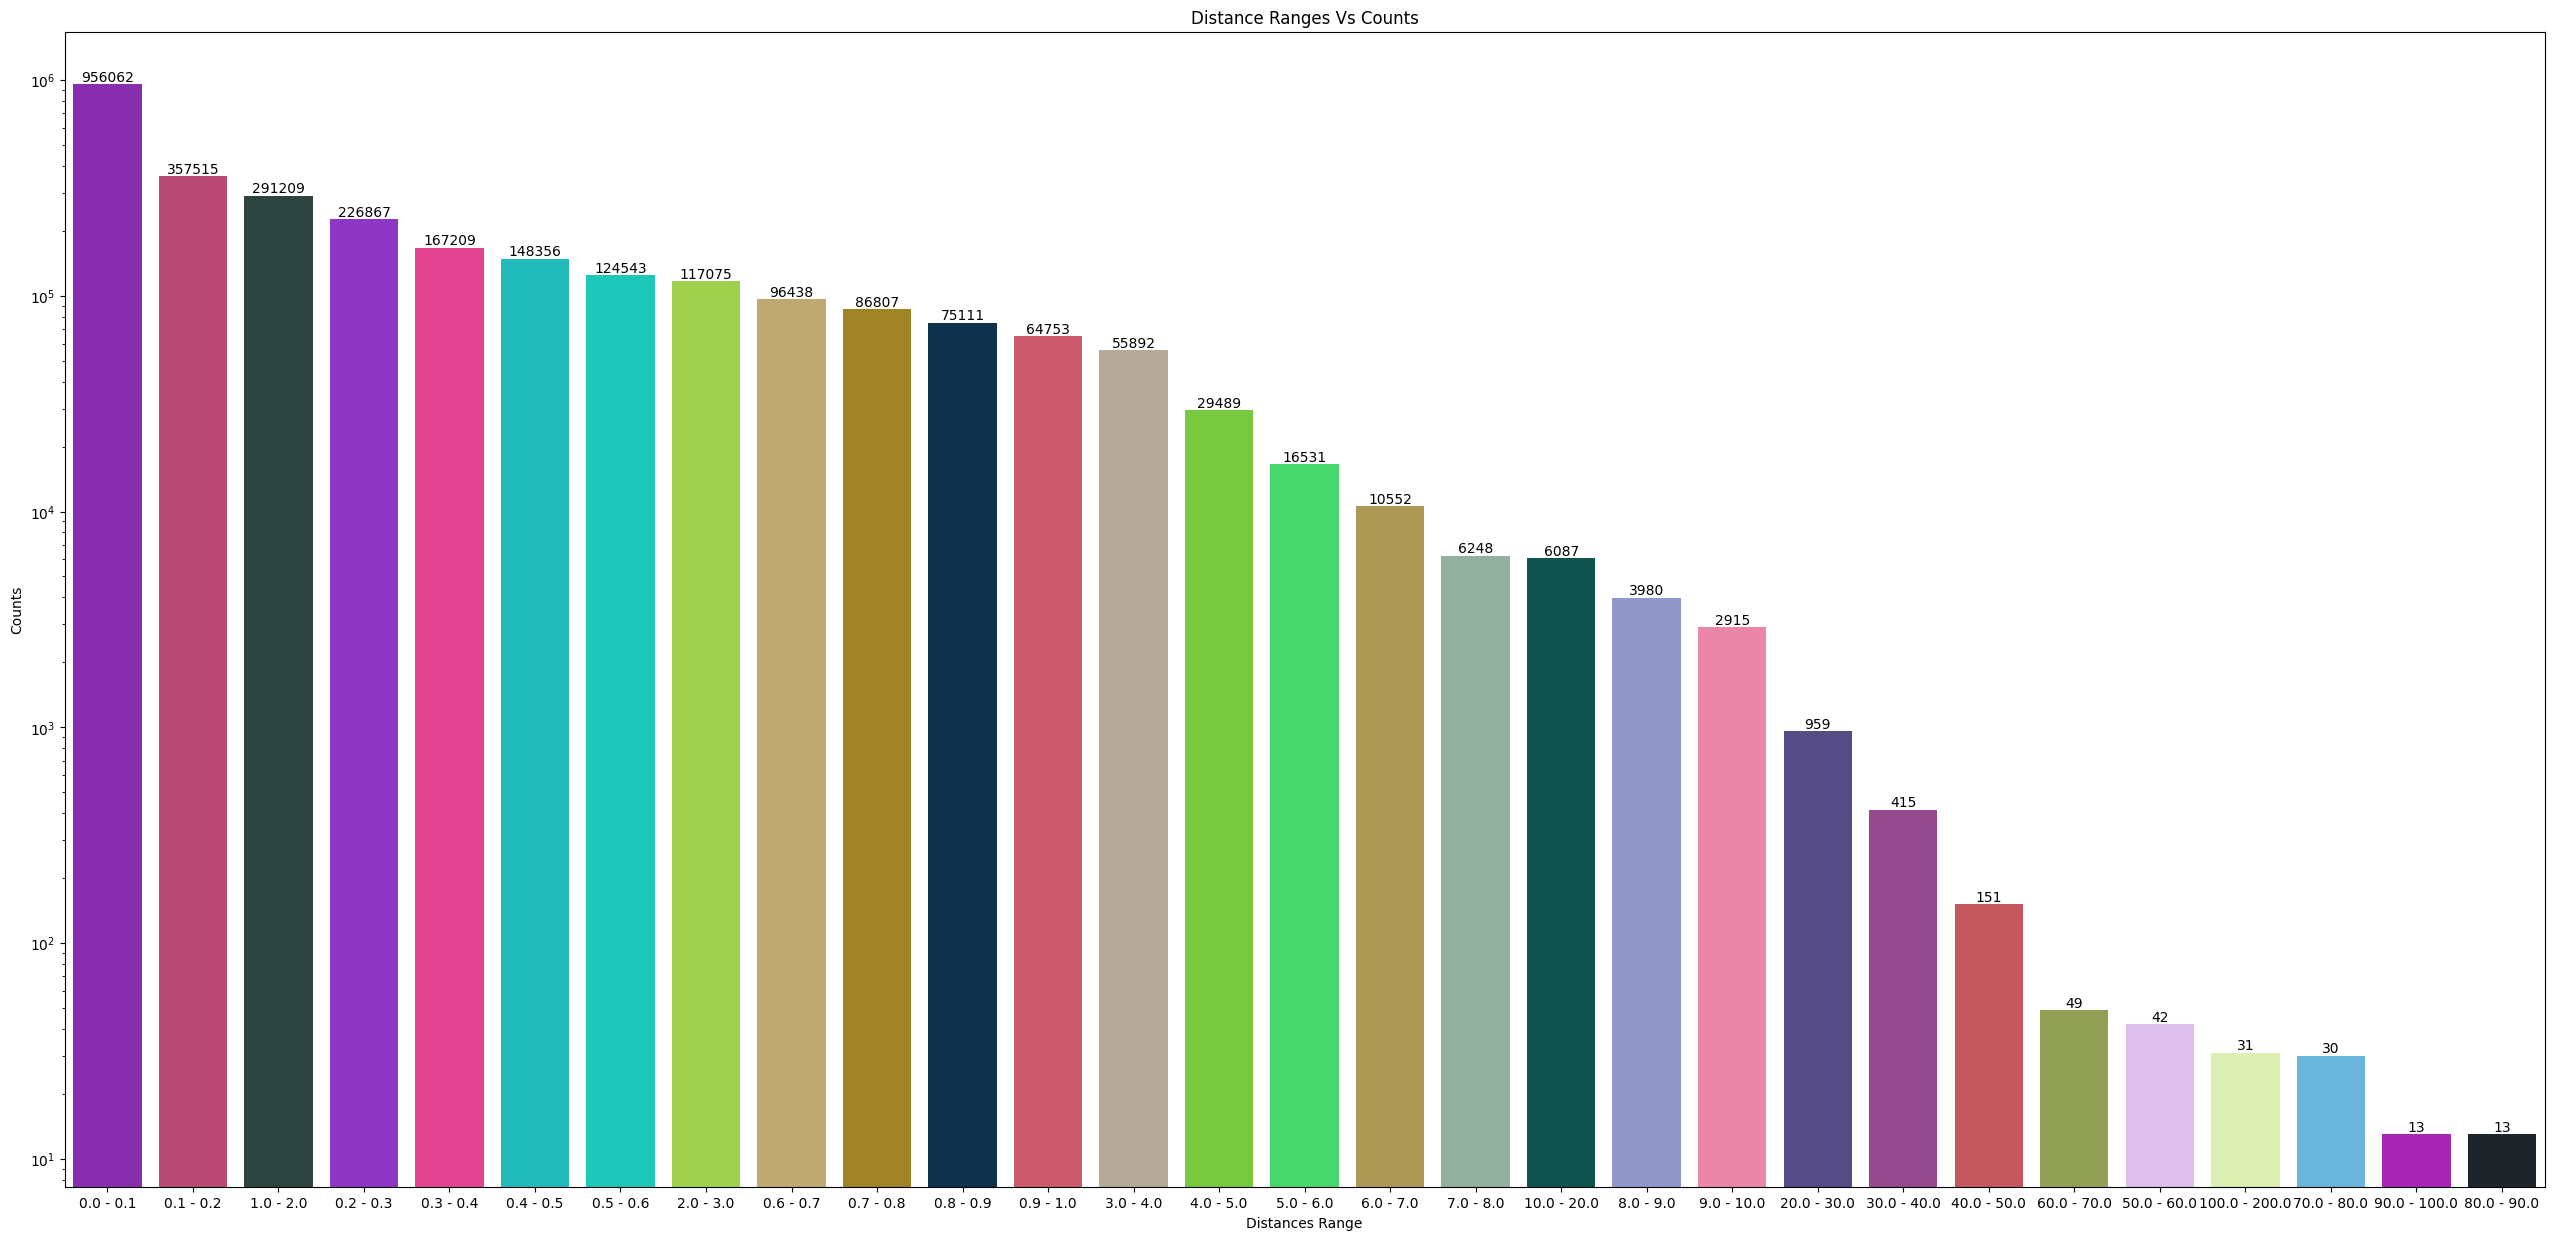

In [ ]:
print(data_2['Distance(mi)'].max()," is the minimum value in the distance column")
print(data_2['Distance(mi)'].min()," is the maximum value in the distance value")

labels_for_Distances = ["0.0 - 0.1","0.1 - 0.2","0.2 - 0.3","0.3 - 0.4","0.4 - 0.5","0.5 - 0.6","0.6 - 0.7","0.7 - 0.8","0.8 - 0.9","0.9 - 1.0","1.0 - 2.0","2.0 - 3.0","3.0 - 4.0","4.0 - 5.0","5.0 - 6.0","6.0 - 7.0","7.0 - 8.0","8.0 - 9.0","9.0 - 10.0","10.0 - 20.0","20.0 - 30.0","30.0 - 40.0","40.0 - 50.0","50.0 - 60.0","60.0 - 70.0","70.0 - 80.0","80.0 - 90.0","90.0 - 100.0","100.0 - 200.0"]

def get_distance_range(distance):
    for r in labels_for_Distances:
        min_range, max_range = re.findall('\d+\.\d+', r)
        if float(min_range) <= distance < float(max_range):
            return r
    return labels_for_Distances[-1]

data_2['Distance_Range'] = data_2['Distance(mi)'].apply(get_distance_range)

colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
          for i in range (len(data_2['Distance_Range'].unique()))]

Distance_count = data_2['Distance_Range'].value_counts()
plt.figure(figsize = (32,15))
Z_5 = sns.barplot(x = Distance_count.index , y = Distance_count.values , palette = colors)
Z_5.bar_label(Z_5.containers[0])
plt.yscale("log")
plt.xlabel('Distances Range')
plt.ylabel('Counts')
plt.title('Distance Ranges Vs Counts')
plt.show()

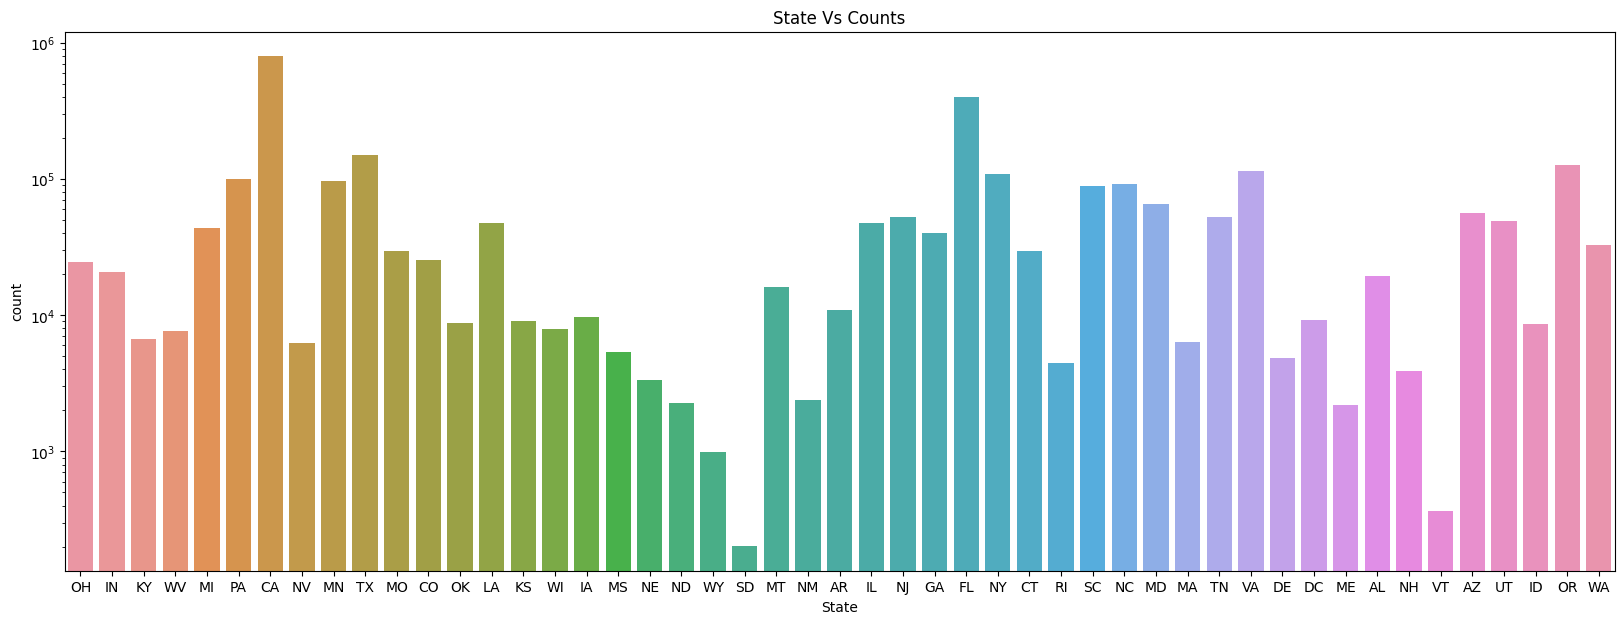

In [ ]:
plt.figure(figsize = (20,7))
Z_0 = sns.countplot(x = 'State', data = data_2)
plt.yscale("log")
#Z_0.bar_label(Z_0.containers[0])
plt.title('State Vs Counts')
plt.show()

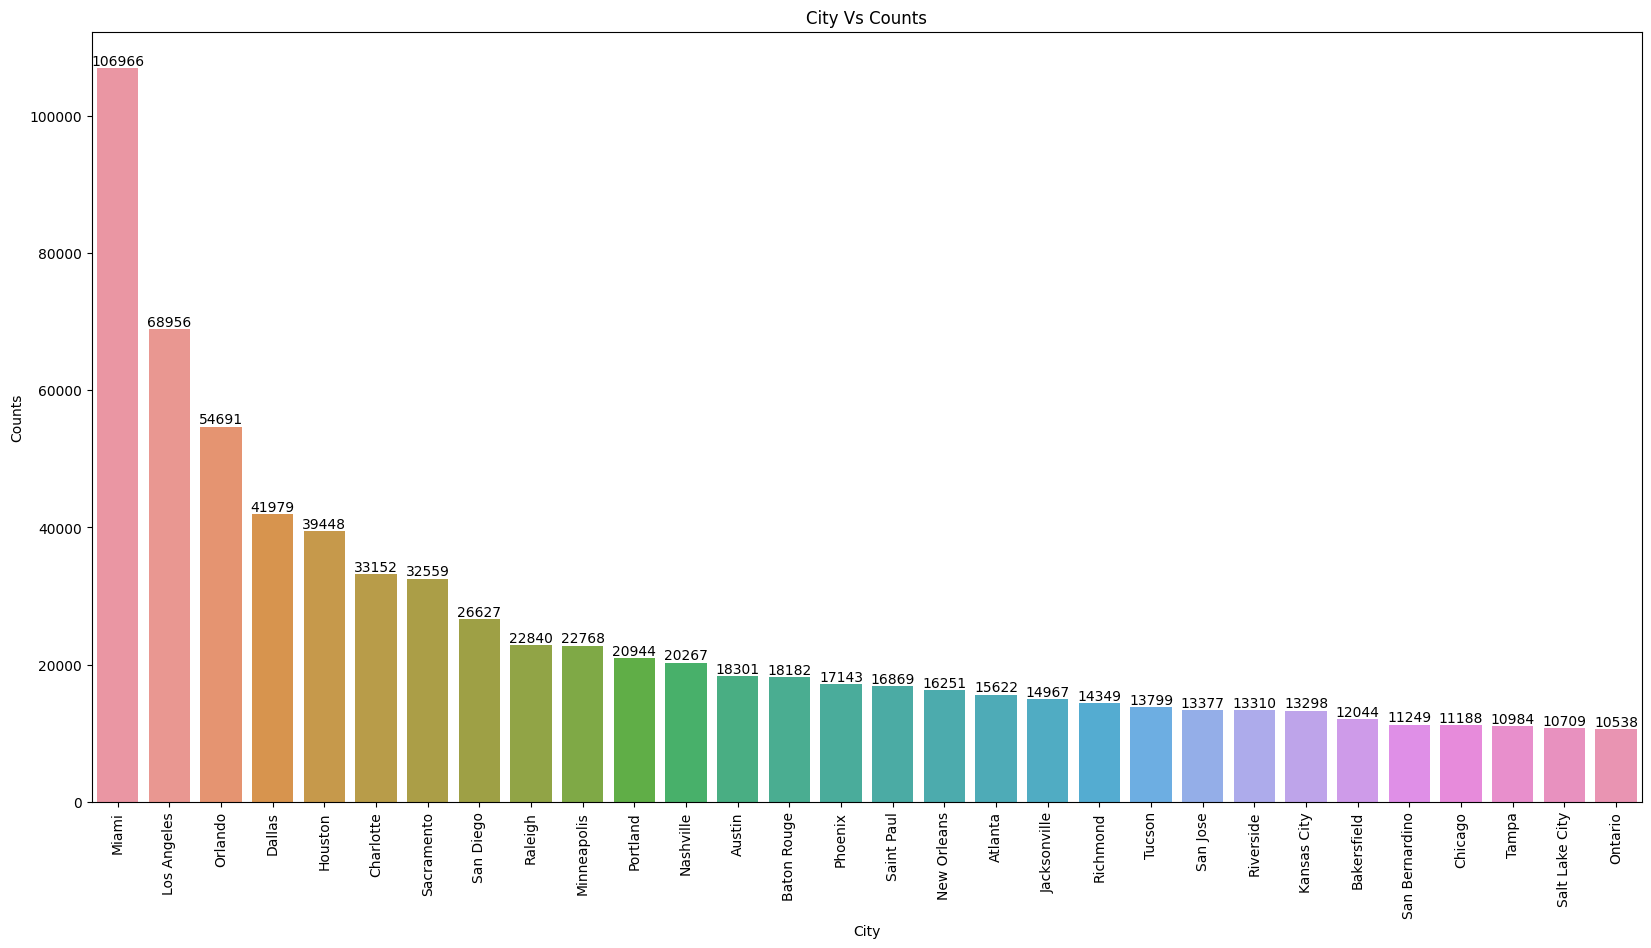

In [ ]:
plt.figure(figsize = (20,10))
X_1 = data_2['City'].value_counts().sort_values(ascending = False).reset_index()
Z_1 = sns.barplot(data = X_1.head(30), x = "index", y = "City")
plt.xticks(rotation = 90)
Z_1.bar_label(Z_1.containers[0])
plt.xlabel('City')
plt.ylabel('Counts')
plt.title('City Vs Counts')
plt.show()

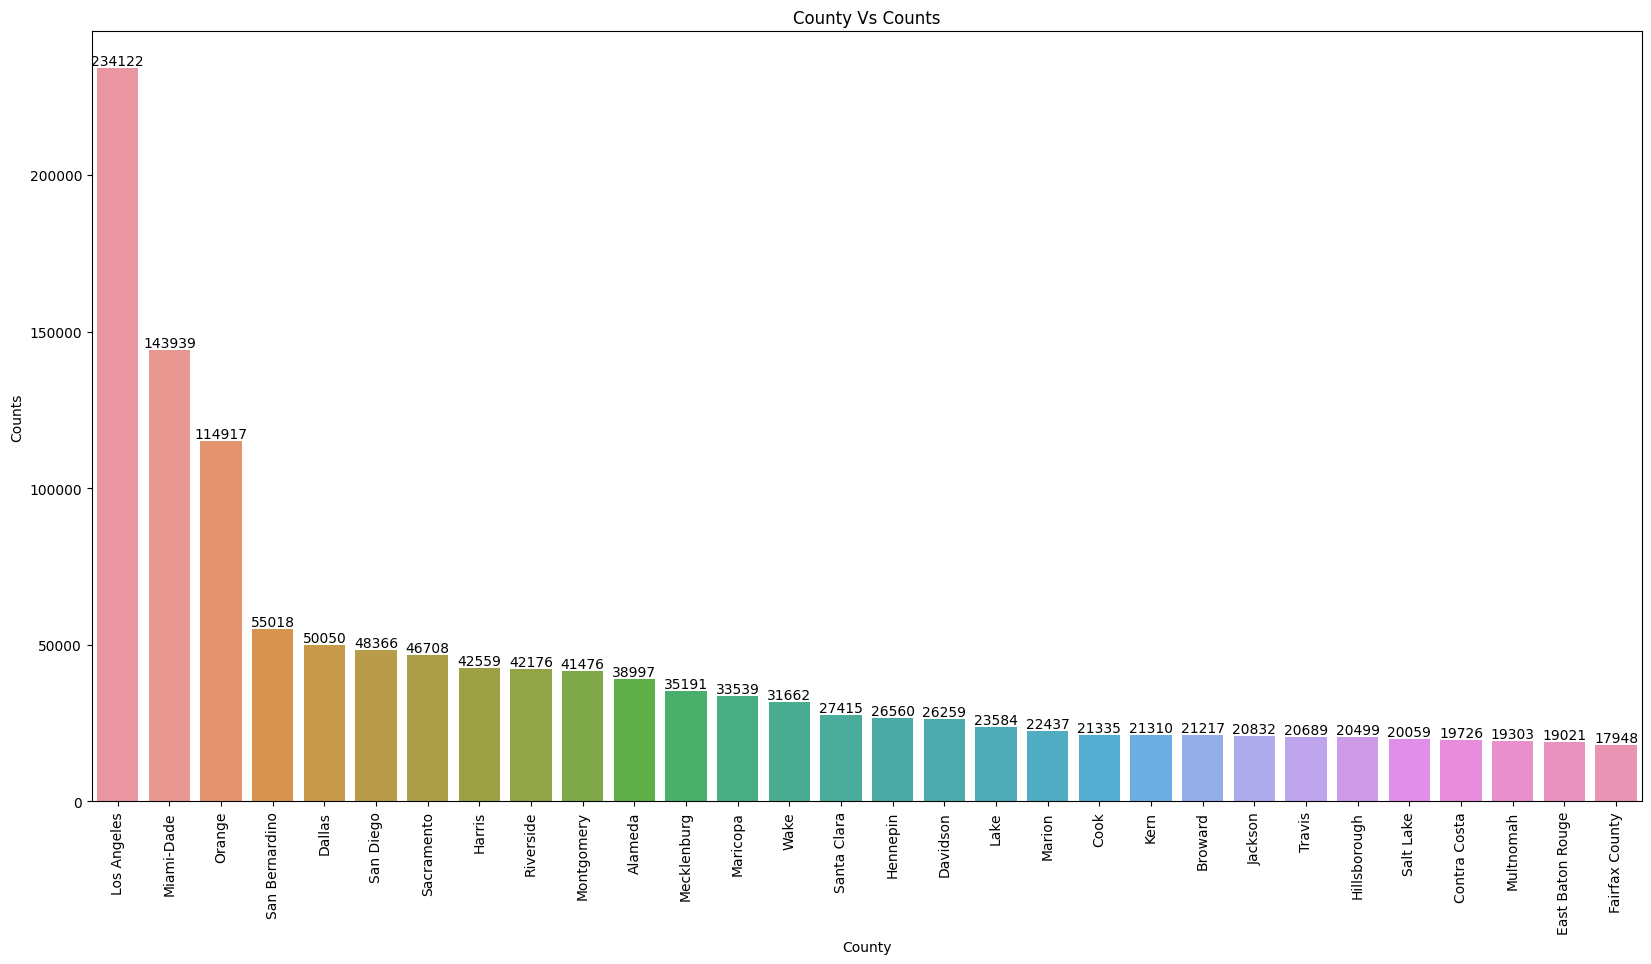

In [ ]:
plt.figure(figsize = (20,10))
X_2 = data_2['County'].value_counts().sort_values(ascending = False).reset_index()
Z_2 = sns.barplot(data = X_2.head(30), x = "index", y = "County")
plt.xticks(rotation = 90)
Z_2.bar_label(Z_2.containers[0])
plt.xlabel('County')
plt.ylabel('Counts')
plt.title('County Vs Counts')
plt.show()

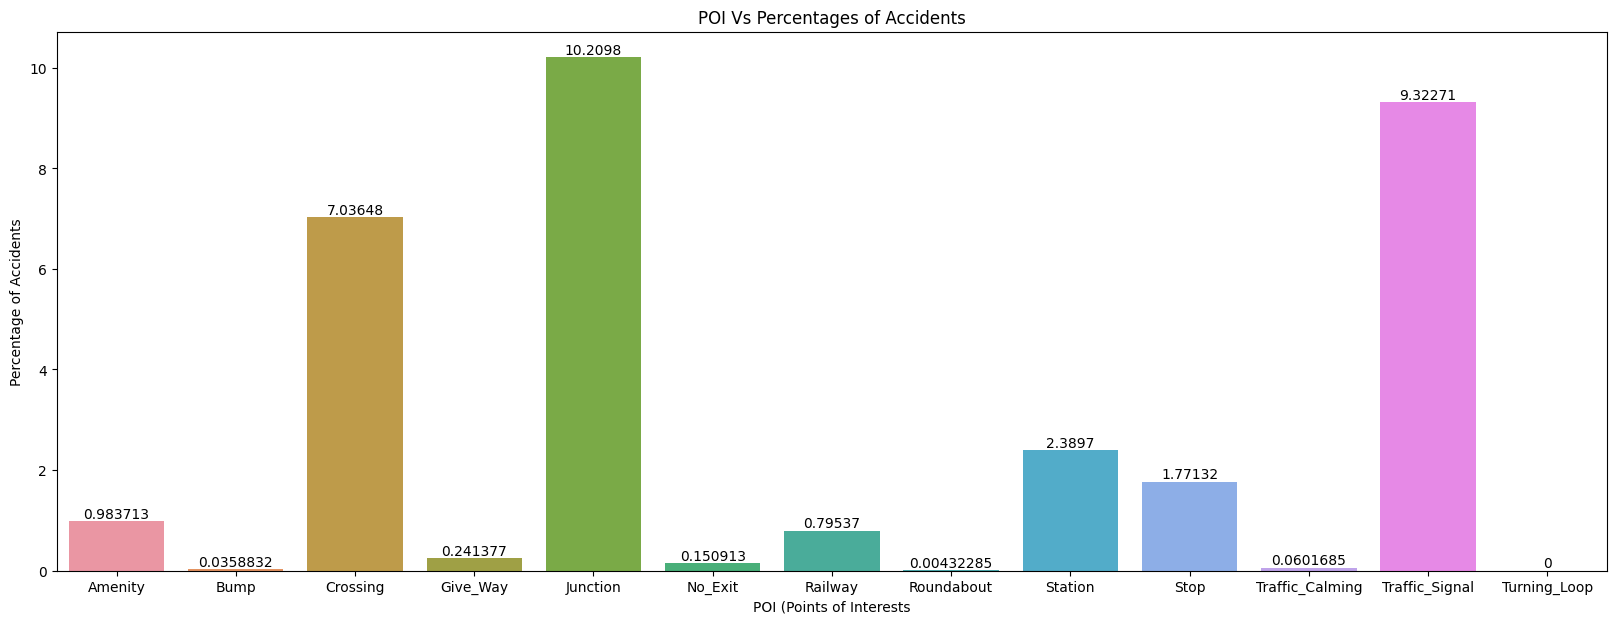

In [ ]:
X_3 = data_2[['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop']]
counts = []
for i in X_3:
  count = 0
  count = X_3[i].sum()
  counts.append(count/len(X_3) * 100)

plt.figure(figsize = (20,7))
Z_3 = sns.barplot(x = [i for i in X_3], y = counts)
Z_3.bar_label(Z_3.containers[0])
plt.title('POI Vs Percentages of Accidents')
plt.xlabel('POI (Points of Interests')
plt.ylabel('Percentage of Accidents')
plt.show()

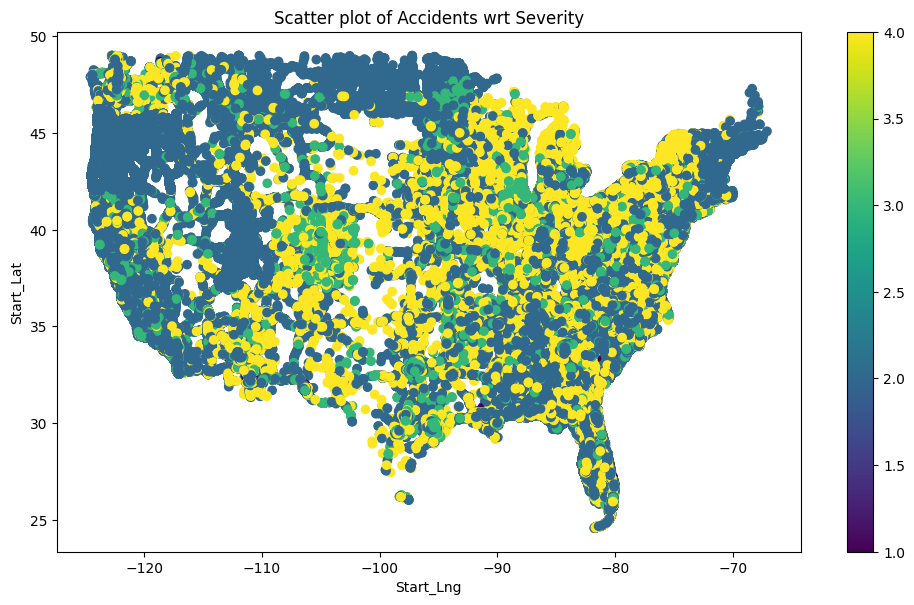

In [ ]:
plt.figure(figsize = (12,6.75))
plt.scatter(data_2['Start_Lng'], data_2['Start_Lat'], c = data_2['Severity'])
plt.colorbar()
plt.xlabel('Start_Lng')
plt.ylabel('Start_Lat')
plt.title('Scatter plot of Accidents wrt Severity')
plt.show()

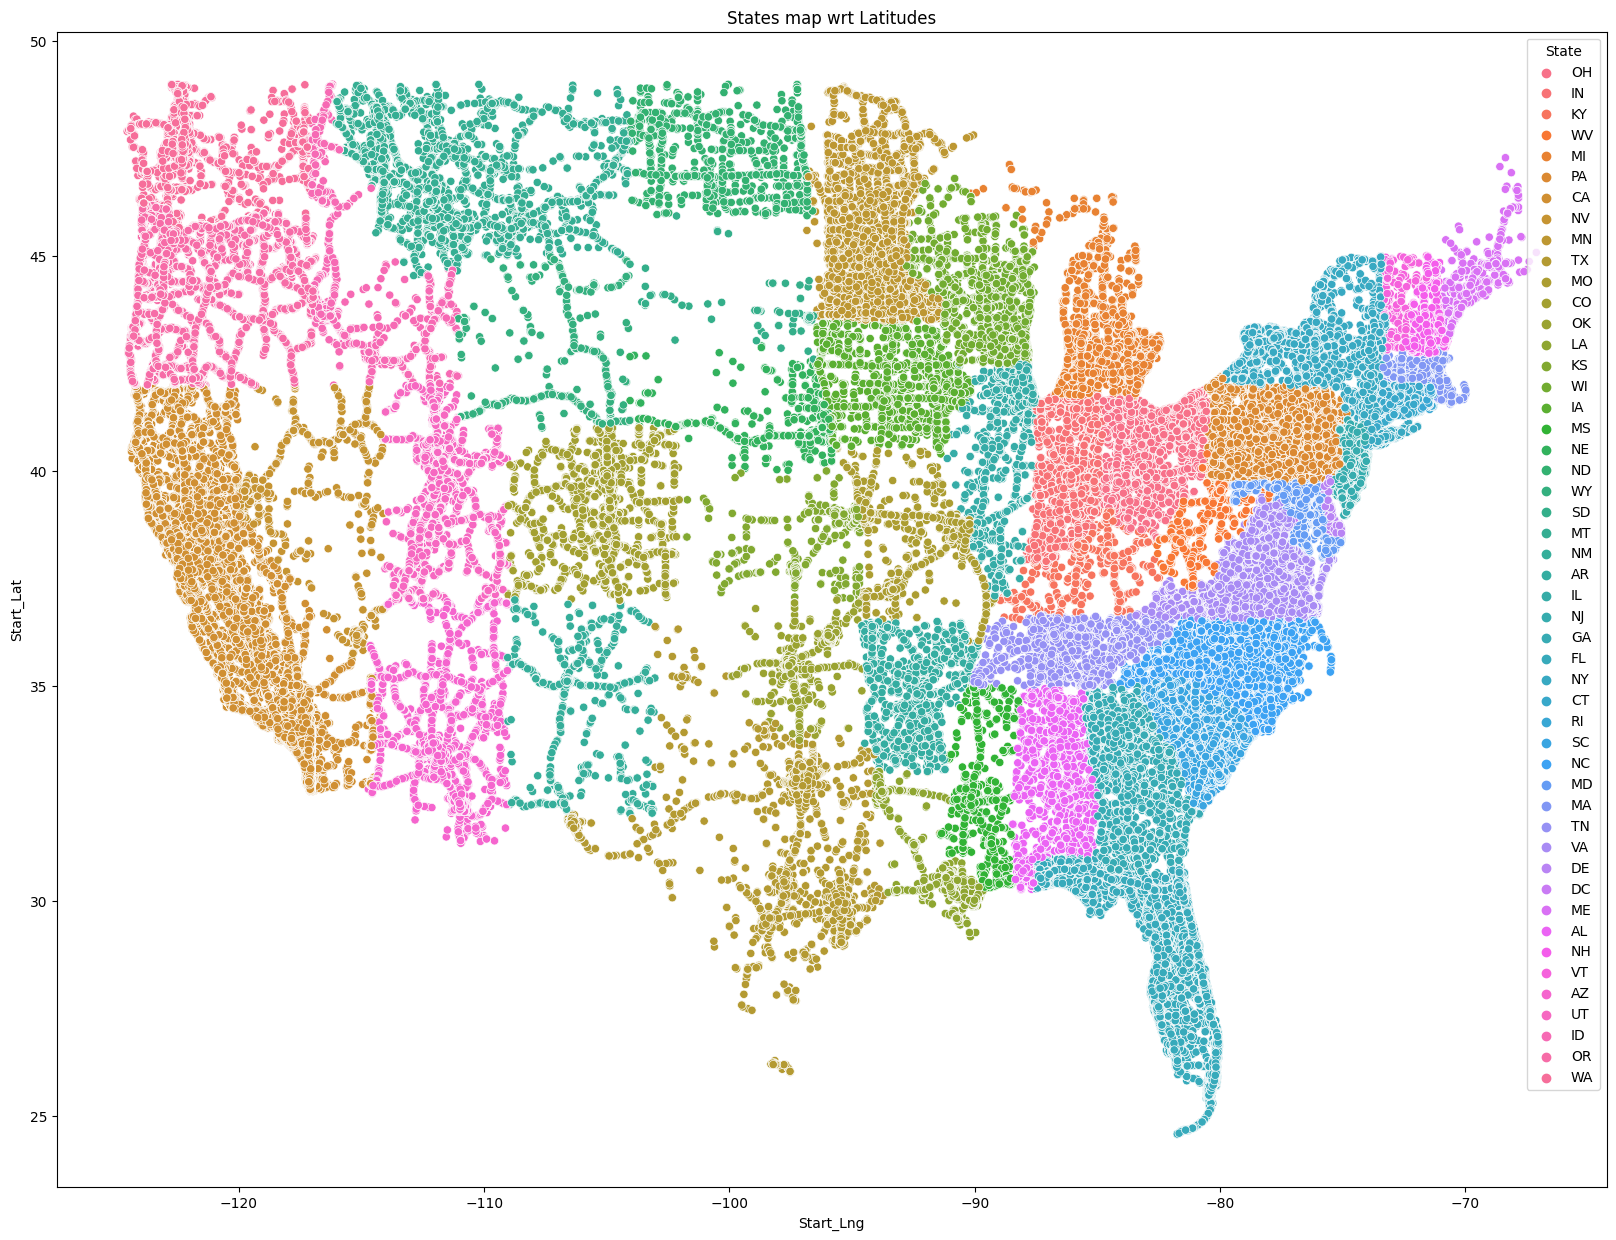

In [ ]:
plt.figure(figsize = (20,15))
sns.scatterplot(x = data_2['Start_Lng'],y = data_2['Start_Lat'], hue = data_2['State'])
plt.xlabel('Start_Lng')
plt.ylabel('Start_Lat')
plt.title('States map wrt Latitudes')
plt.show()

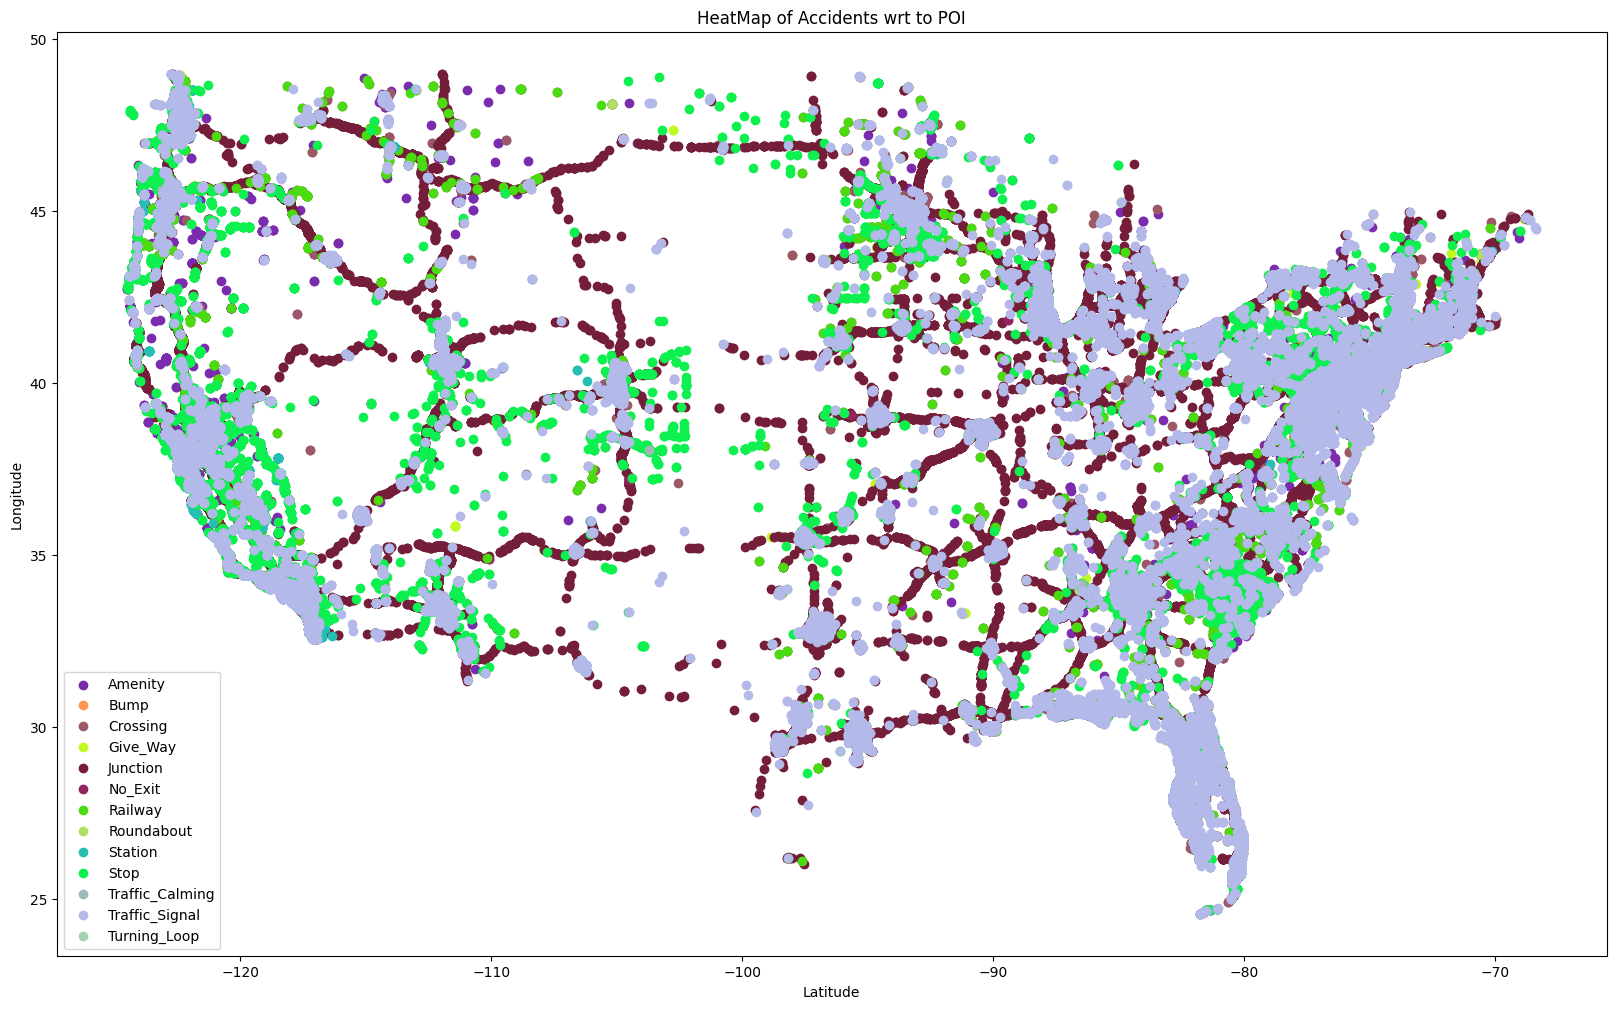

In [ ]:
bool_cols = data_2.iloc[:, 9:22]
plt.figure(figsize = (20,12))
for i,col in enumerate(bool_cols):
  colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])]
  plt.scatter(data_2['Start_Lng'][data_2[col]], data_2['Start_Lat'][data_2[col]], label=col, color = colors)
plt.legend()
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('HeatMap of Accidents wrt to POI')
plt.show()

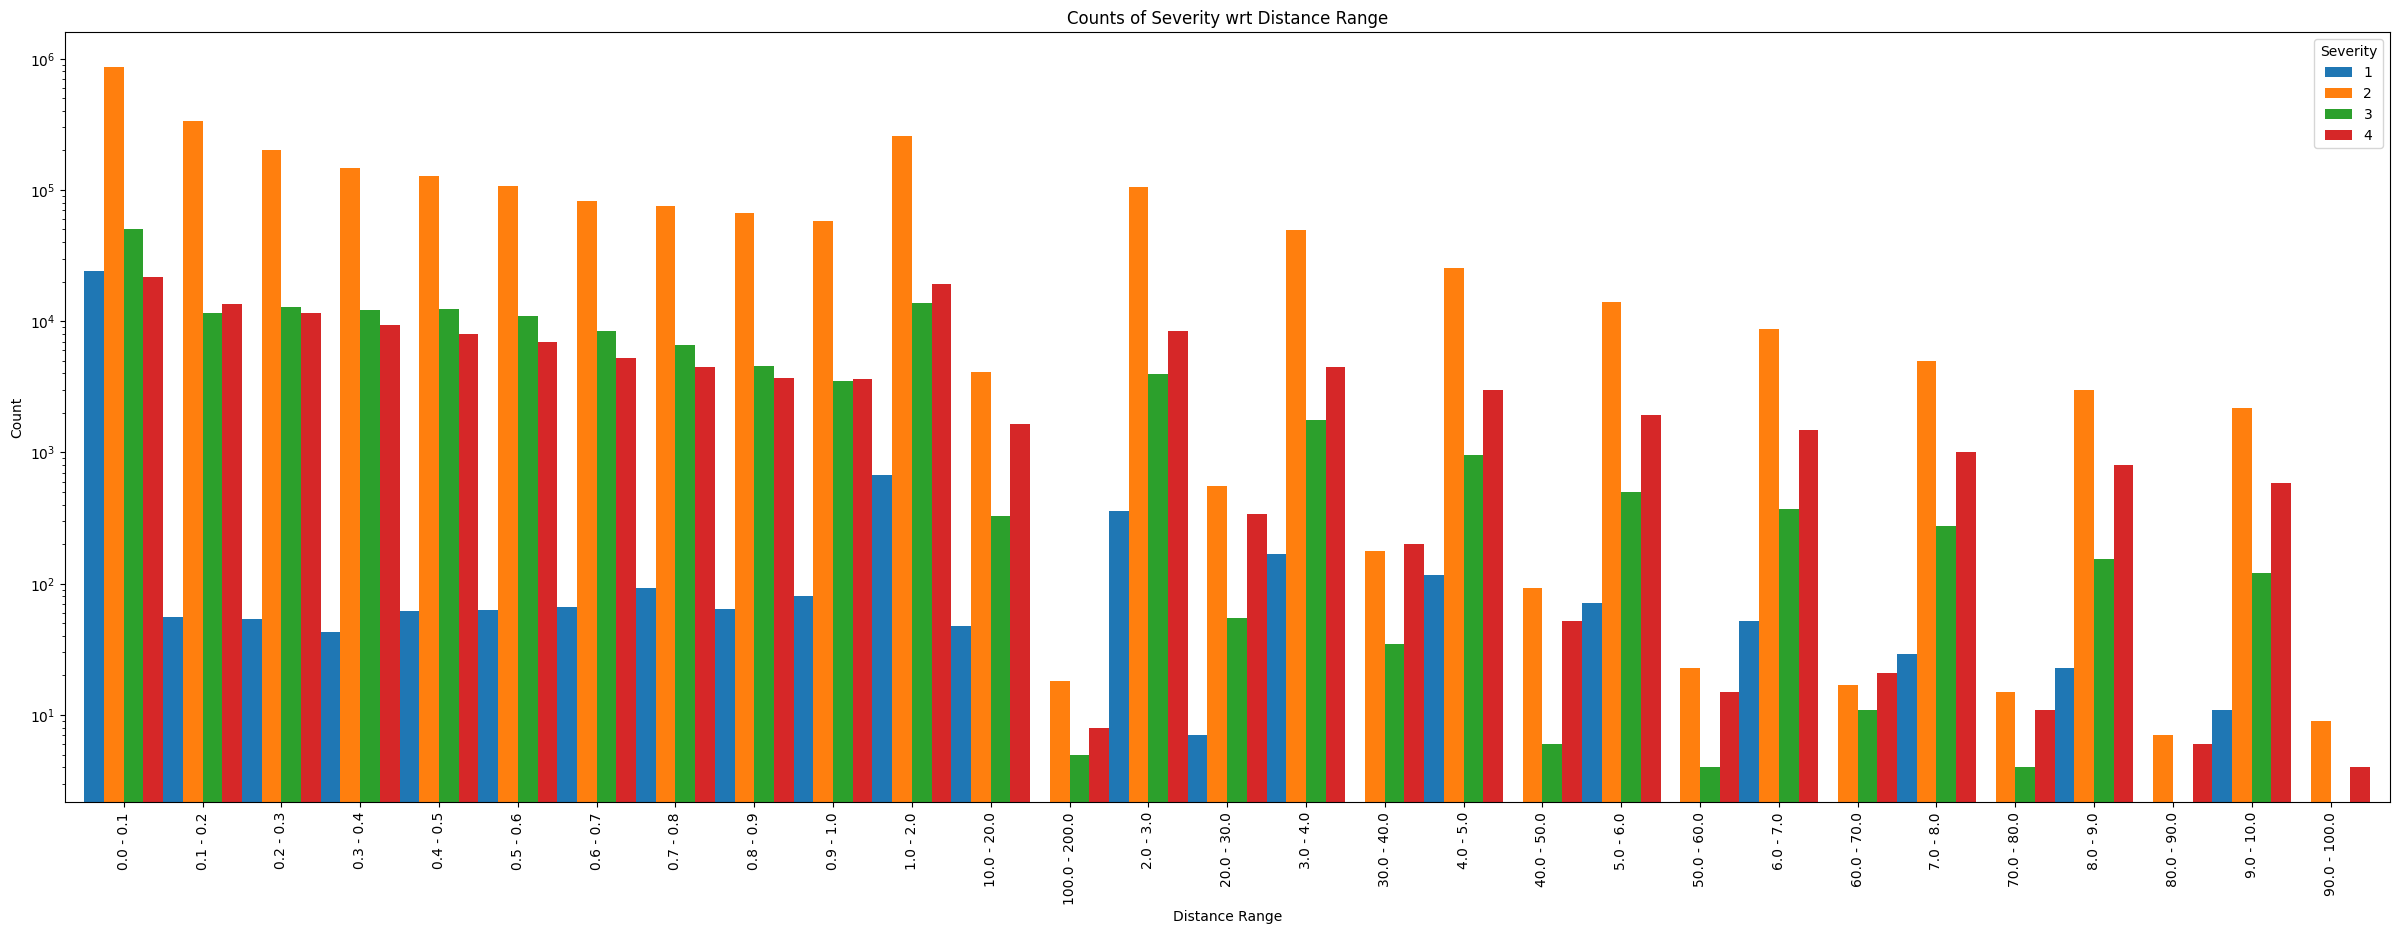

In [ ]:
X_5 = data_2.groupby('Distance_Range')['Severity'].value_counts(ascending = False).unstack()
X_5.fillna(0, inplace = True)
X_5.plot.bar(figsize=(30, 10), width = 1.0)
plt.xlabel('Distance Range')
plt.ylabel('Count')
plt.title('Counts of Severity wrt Distance Range')
plt.legend(title='Severity')
plt.yscale("log")
plt.show()

#**CREATING NEW COLUMNS FOR BETTER UNDERSTANDING OF OUR DATA**

In [ ]:
data_2['Start_Time'] = pd.to_datetime(data_2['Start_Time'])
data_2['Year'] = data_2['Start_Time'].dt.year
data_2['Month'] = data_2['Start_Time'].dt.month_name()
data_2['WeekDay'] = data_2['Start_Time'].dt.day_name()
data_2['Hour'] = data_2['Start_Time'].dt.hour

final_data = data_2.drop(['End_Time'], axis = 1)

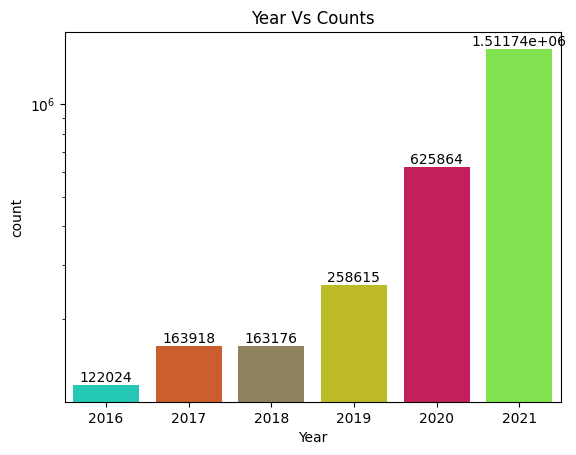

In [ ]:
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
            for i in range(len(data_2['Month']))]

Z_6 = sns.countplot(x = 'Year', data = final_data, palette = colors)
Z_6.bar_label(Z_6.containers[0])
plt.title('Year Vs Counts')
plt.yscale("log")
plt.show()

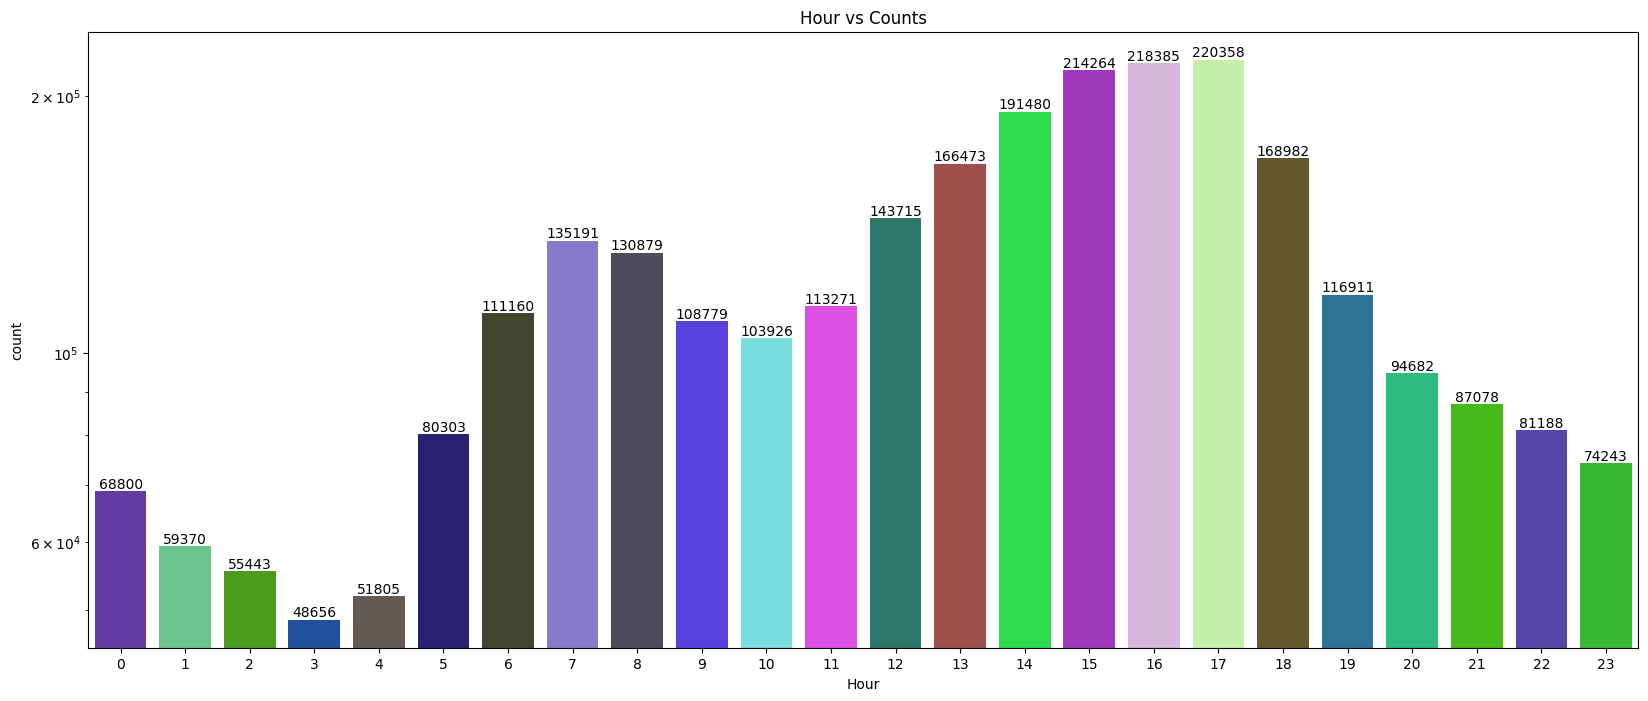

In [ ]:
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
            for i in range(len(data_2['Month']))]

plt.figure(figsize = (20,8))
Z_7 = sns.countplot(x = 'Hour', data = final_data, palette = colors)
Z_7.bar_label(Z_7.containers[0])
plt.yscale("log")
plt.title('Hour vs Counts')
plt.show()

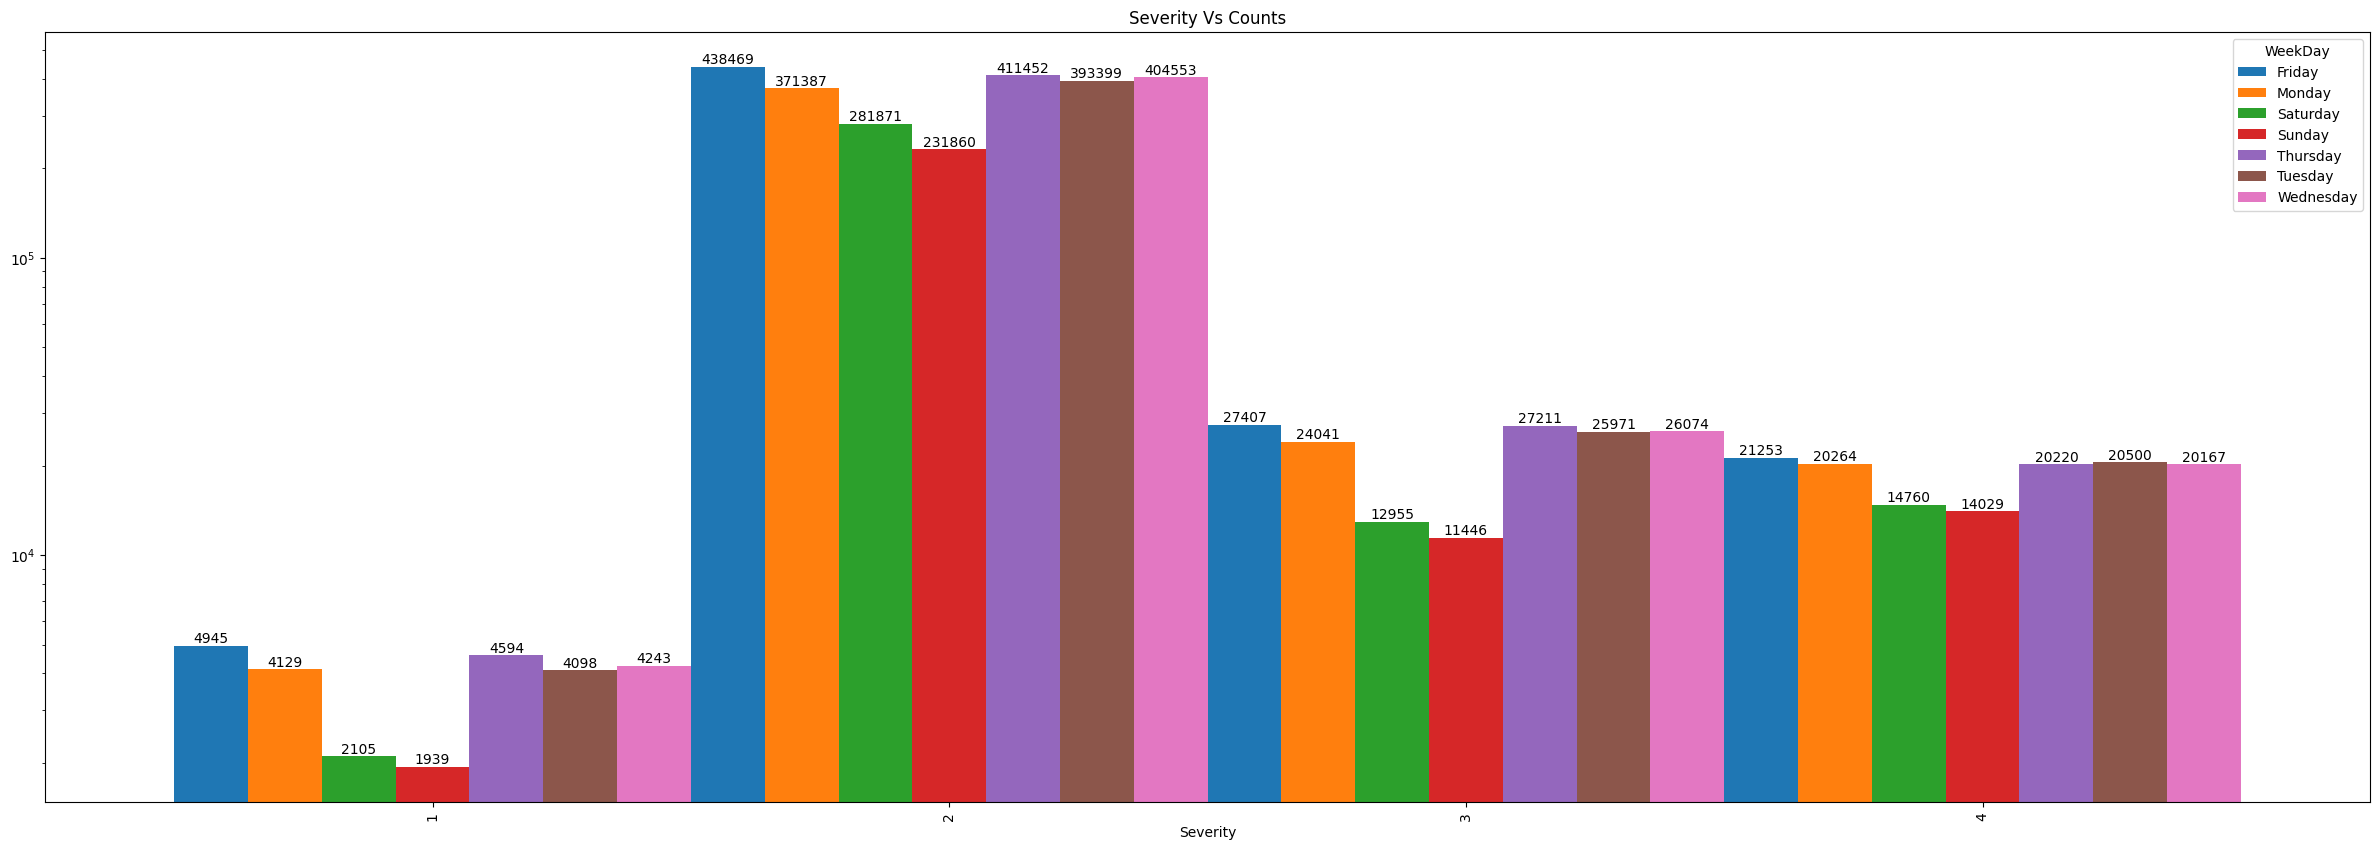

In [ ]:
X_6 = data_2.groupby('Severity')['WeekDay'].value_counts().unstack()
Z_8 = X_6.plot.bar(figsize=(30, 10), width = 1.0)
for i in range(data_2['WeekDay'].nunique()):
  Z_8.bar_label(Z_8.containers[i])
plt.legend(title='WeekDay')
plt.yscale("log")
plt.title('Severity Vs Counts')
plt.show()

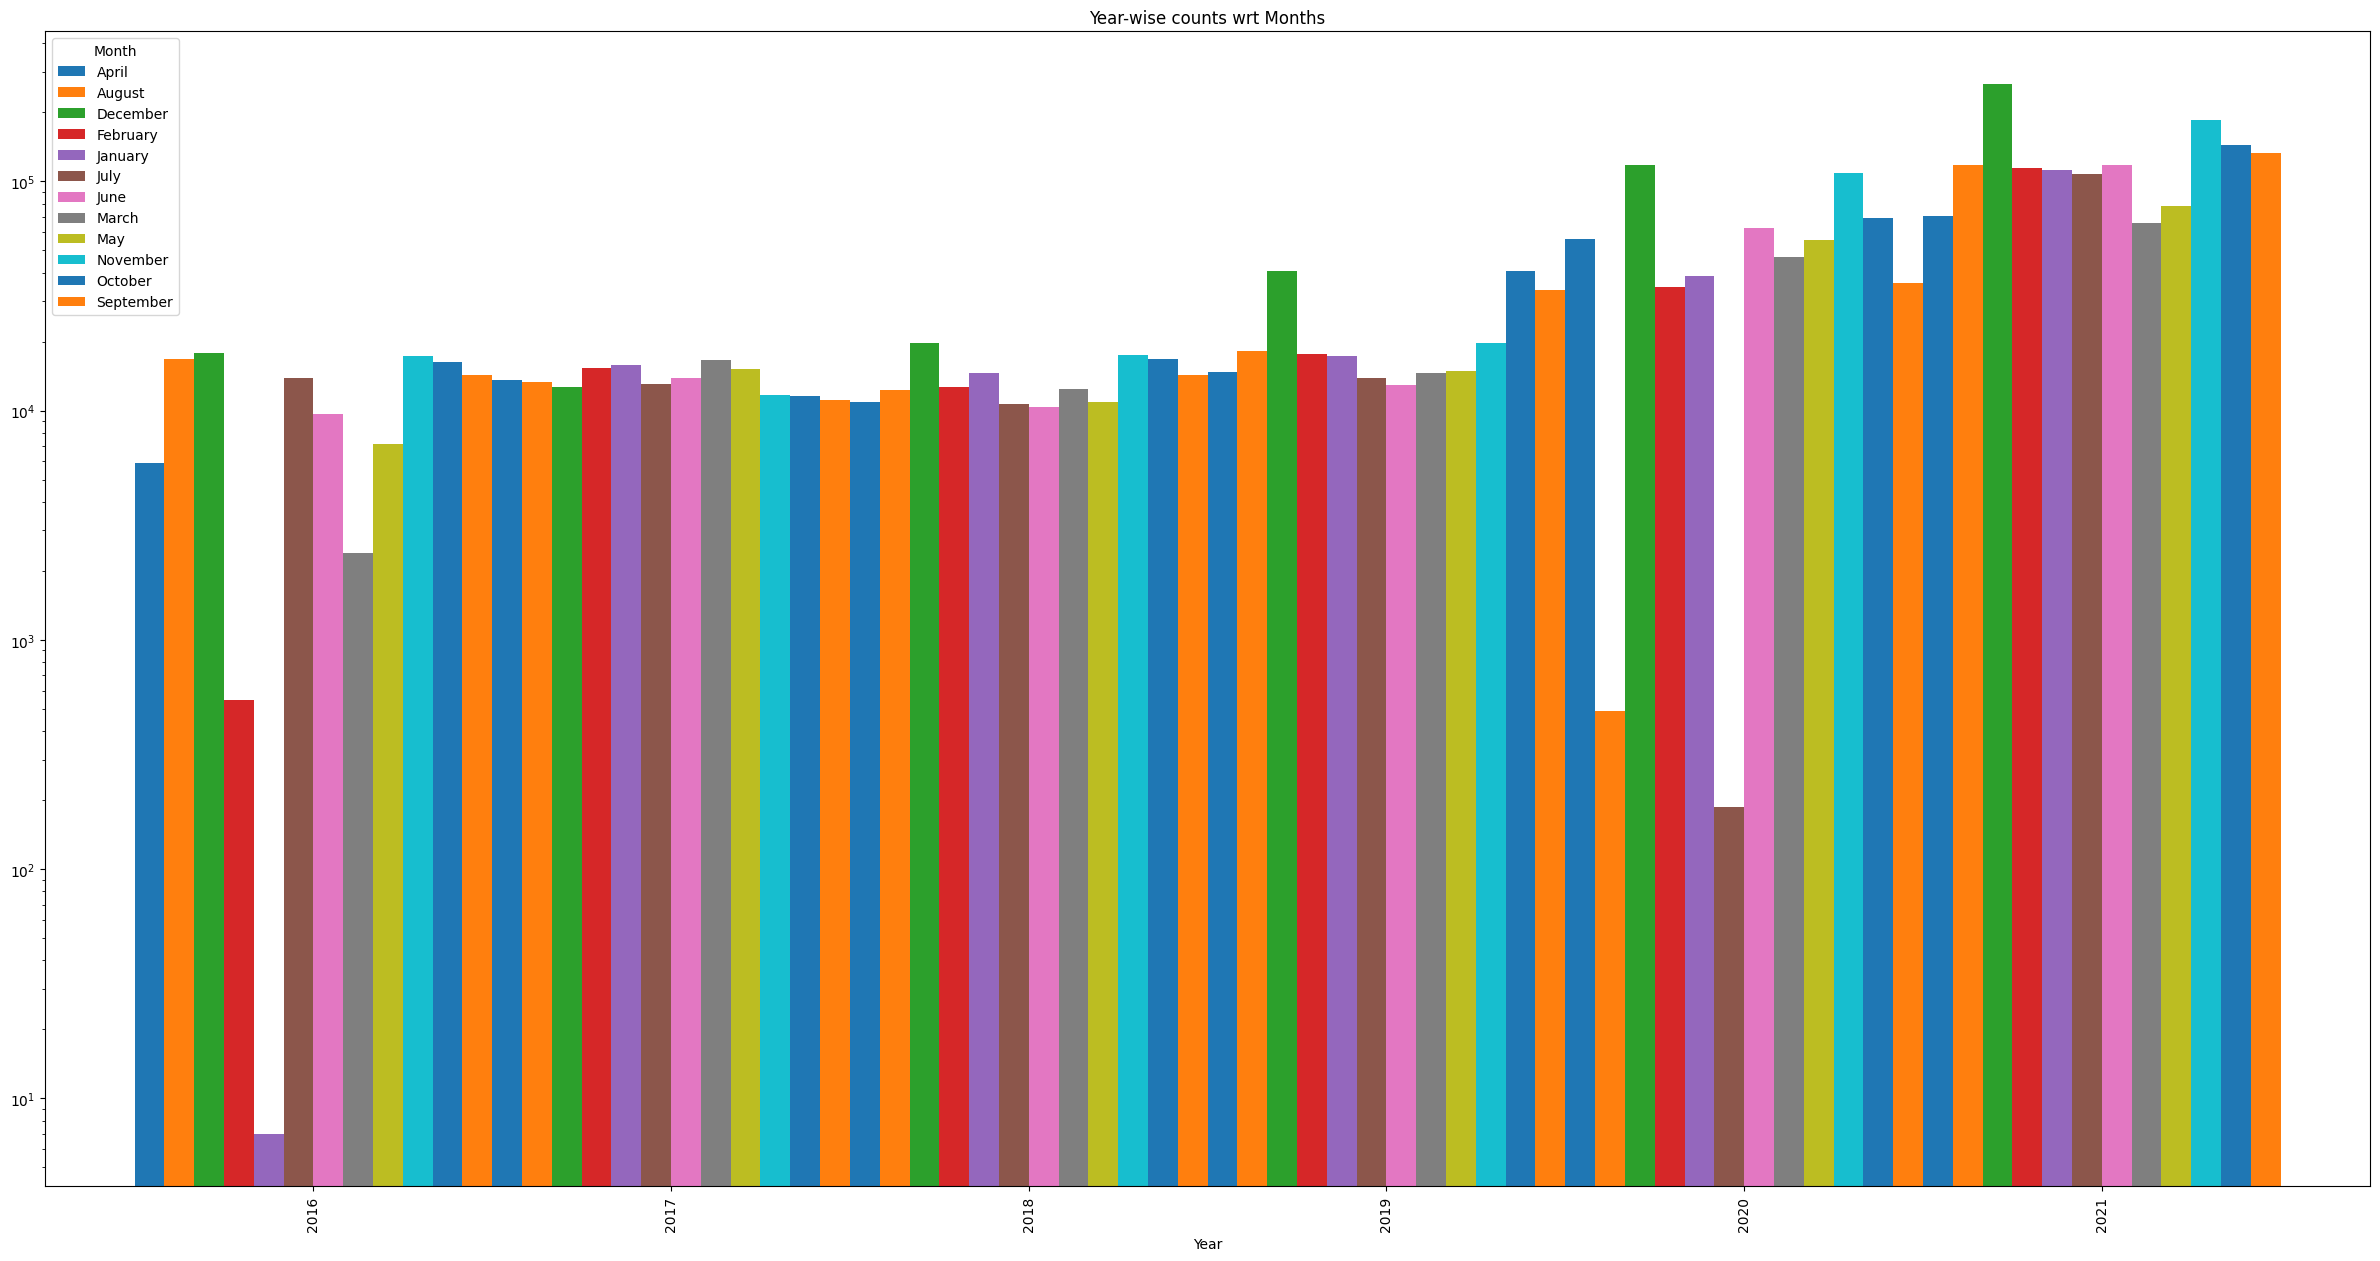

In [ ]:
X_7 = data_2.groupby('Year')['Month'].value_counts().unstack()
Z_9 = X_7.plot.bar(figsize = (30,15), width = 1.0)
plt.yscale("log")
plt.legend(loc = 'upper left', title = 'Month')
plt.title("Year-wise counts wrt Months")
plt.show()

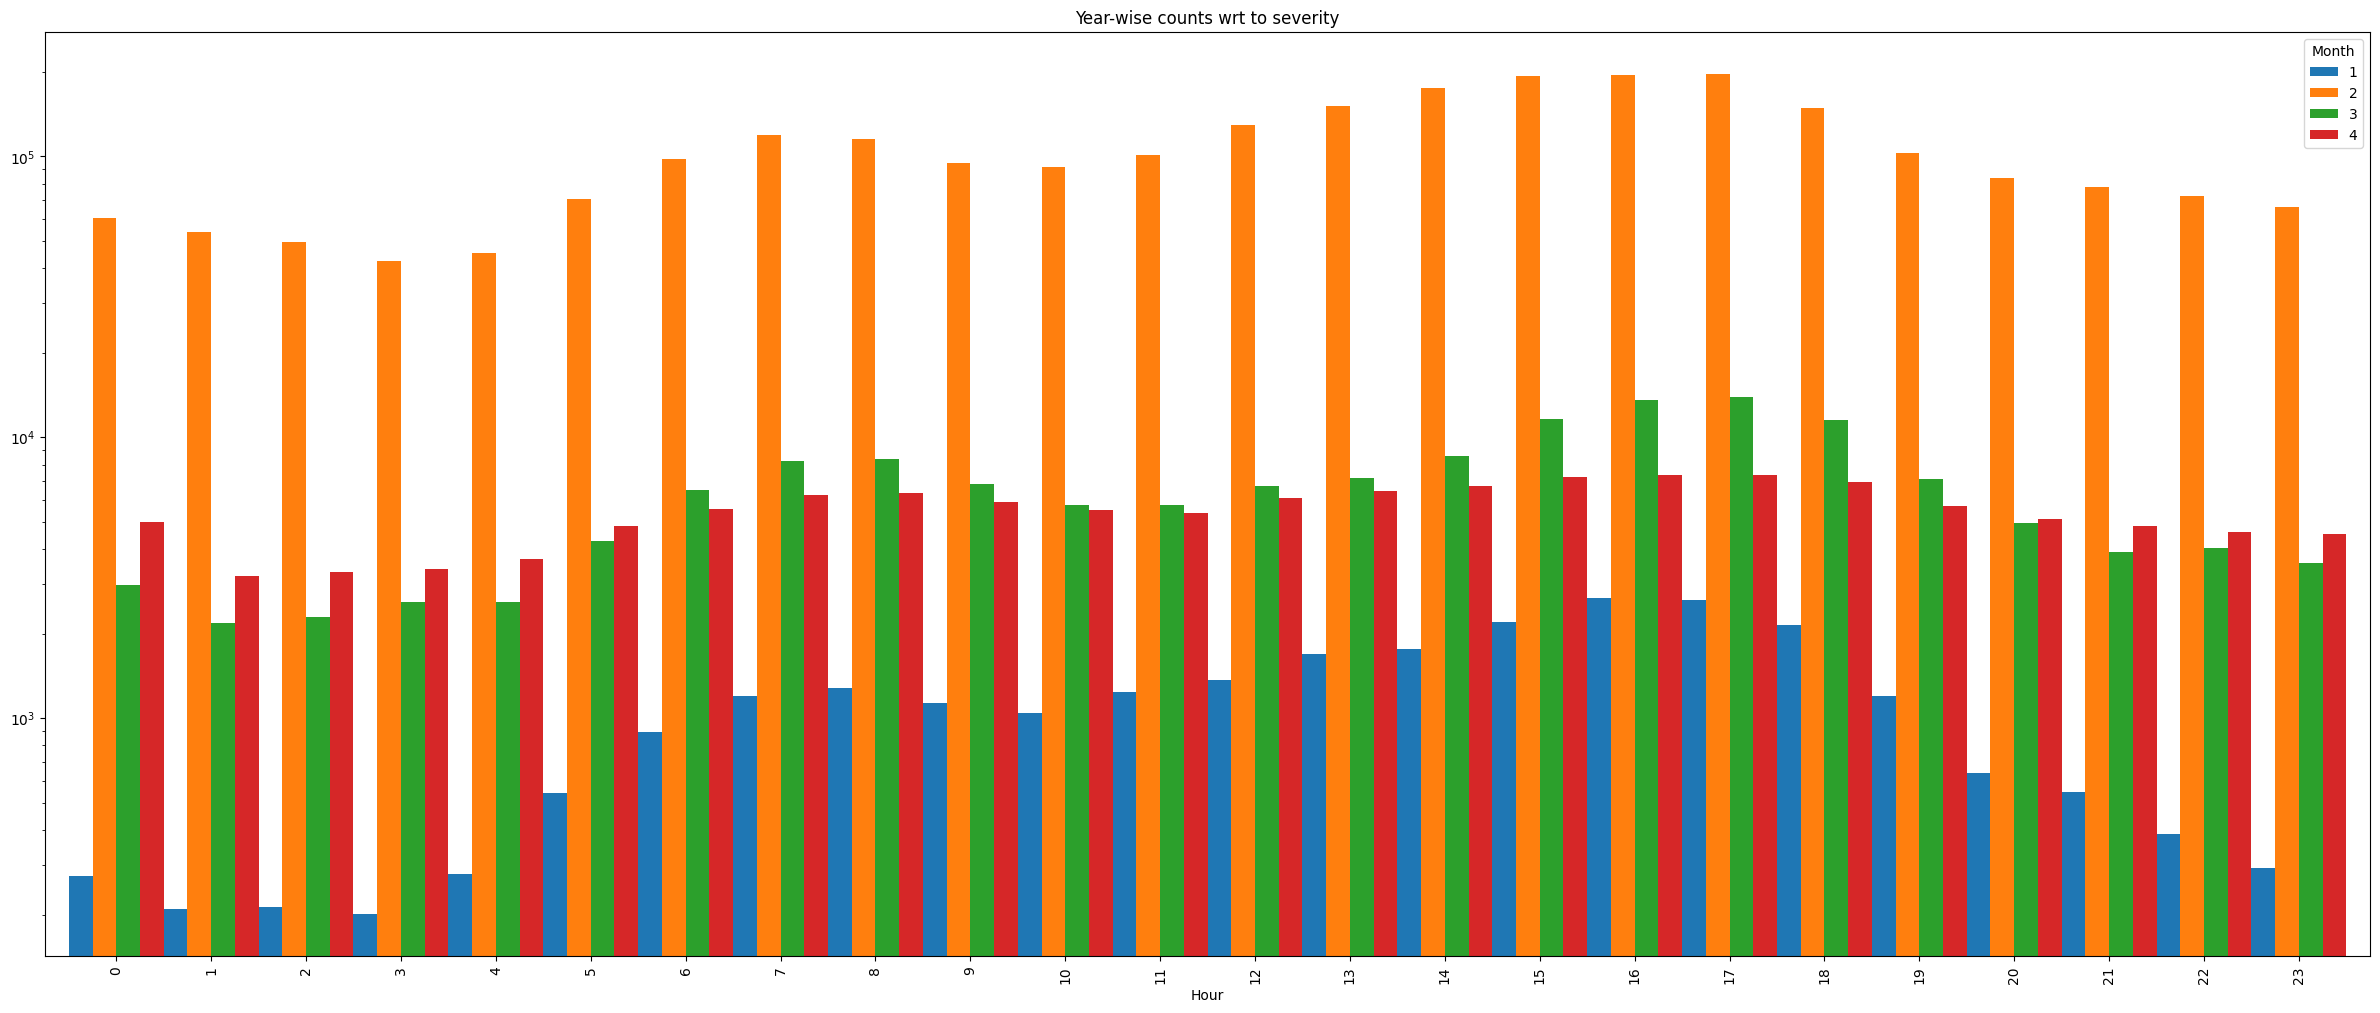

In [ ]:
X_8 = data_2.groupby('Hour')['Severity'].value_counts().unstack()
Z_10 = X_8.plot.bar(figsize = (30, 12), width = 1.0)
plt.legend(title = 'Severrity')
plt.yscale("log")
plt.legend(title = 'Month')
plt.title("Hourly counts wrt to severity")
plt.show()

#**PREPROCESSING FOR ANALYSIS**

In [11]:
raw_data = pd.read_csv("/content/US_Accidents_Dec21_updated.csv")
raw_data

ID  Severity           Start_Time             End_Time  \
0              A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08   
1              A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20   
2              A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39   
3              A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45   
4              A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43   
...            ...       ...                  ...                  ...   
2845337  A-2845338         2  2019-08-23 18:03:25  2019-08-23 18:32:01   
2845338  A-2845339         2  2019-08-23 19:11:30  2019-08-23 19:38:23   
2845339  A-2845340         2  2019-08-23 19:00:21  2019-08-23 19:28:49   
2845340  A-2845341         2  2019-08-23 19:00:21  2019-08-23 19:29:42   
2845341  A-2845342         2  2019-08-23 18:52:06  2019-08-23 19:21:31   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0        40.108910  -83.092860  40.112060  -83.031870         3.230   
1        39.865420  -84.062800  39.865010  -84.048730         0.747   
2        39.102660  -84.524680  39.102090  -84.523960         0.055   
3        41.062130  -81.537840  41.062170  -81.535470         0.123   
4        39.172393  -84.492792  39.170476  -84.501798         0.500   
...            ...         ...        ...         ...           ...   
2845337  34.002480 -117.379360  33.998880 -117.370940         0.543   
2845338  32.766960 -117.148060  32.765550 -117.153630         0.338   
2845339  33.775450 -117.847790  33.777400 -117.857270         0.561   
2845340  33.992460 -118.403020  33.983110 -118.395650         0.772   
2845341  34.133930 -117.230920  34.137360 -117.239340         0.537   

                                               Description  ...  Roundabout  \
0        Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   
1                       At OH-4/OH-235/Exit 41 - Accident.  ...       False   
2                         At I-71/US-50/Exit 1 - Accident.  ...       False   
3                          At Dart Ave/Exit 21 - Accident.  ...       False   
4                       At Mitchell Ave/Exit 6 - Accident.  ...       False   
...                                                    ...  ...         ...   
2845337                           At Market St - Accident.  ...       False   
2845338    At Camino Del Rio/Mission Center Rd - Accident.  ...       False   
2845339  At Glassell St/Grand Ave - Accident. in the ri...  ...       False   
2845340     At CA-90/Marina Fwy/Jefferson Blvd - Accident.  ...       False   
2845341              At Highland Ave/Arden Ave - Accident.  ...       False   

        Station   Stop Traffic_Calming Traffic_Signal Turning_Loop  \
0         False  False           False          False        False   
1         False  False           False          False        False   
2         False  False           False          False        False   
3         False  False           False          False        False   
4         False  False           False          False        False   
...         ...    ...             ...            ...          ...   
2845337   False  False           False          False        False   
2845338   False  False           False          False        False   
2845339   False  False           False          False        False   
2845340   False  False           False          False        False   
2845341   False  False           False          False        False   

        Sunrise_Sunset Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0                Night          Night             Night                 Night  
1                Night          Night             Night                 Night  
2                Night          Night             Night                   Day  
3                Night          Night               Day                   Day  
4                  Day            Day               Day                   Day  
... 

In [12]:
raw_data['Start_Time'] = pd.to_datetime(raw_data['Start_Time'])
raw_data['End_Time'] = pd.to_datetime(raw_data['End_Time'])
raw_data['Weather_Timestamp'] = pd.to_datetime(raw_data['Weather_Timestamp'])

raw_data['Year'] = raw_data['Start_Time'].dt.year
raw_data['Month'] = raw_data['Start_Time'].dt.month
raw_data['Weekday'] = raw_data['Start_Time'].dt.weekday
days_each_month = np.cumsum(np.array([0,31,28,31,30,31,30,31,31,30,31,30,31]))
day = [days_each_month[arg - 1] for arg in raw_data['Month'].values]
raw_data['Day'] = day + raw_data['Start_Time'].dt.day.values
raw_data['Hour'] = raw_data['Start_Time'].dt.hour
raw_data['Minute'] = raw_data['Hour']*60.0 + raw_data['Start_Time'].dt.minute
state_var = raw_data['State']

In [ ]:
for i in raw_data:
  print(i)

ID
Severity
Start_Time
End_Time
Start_Lat
Start_Lng
End_Lat
End_Lng
Distance(mi)
Description
Number
Street
Side
City
County
State
Zipcode
Country
Timezone
Airport_Code
Weather_Timestamp
Temperature(F)
Wind_Chill(F)
Humidity(%)
Pressure(in)
Visibility(mi)
Wind_Direction
Wind_Speed(mph)
Precipitation(in)
Weather_Condition
Amenity
Bump
Crossing
Give_Way
Junction
No_Exit
Railway
Roundabout
Station
Stop
Traffic_Calming
Traffic_Signal
Turning_Loop
Sunrise_Sunset
Civil_Twilight
Nautical_Twilight
Astronomical_Twilight
Year
Month
Weekday
Day
Hour
Minute


In [ ]:
raw_data.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [ ]:
print("The mean differenve between weathee timestamp and Start Time is : ",(raw_data['Weather_Timestamp'] - raw_data['Start_Time']).mean())
#We do this to confirm whether our weather timestamp is exactly after beggining of the accident and at the end of the accident

The mean differenve between weathee timestamp and Start Time is :  0 days 00:01:11.643297838


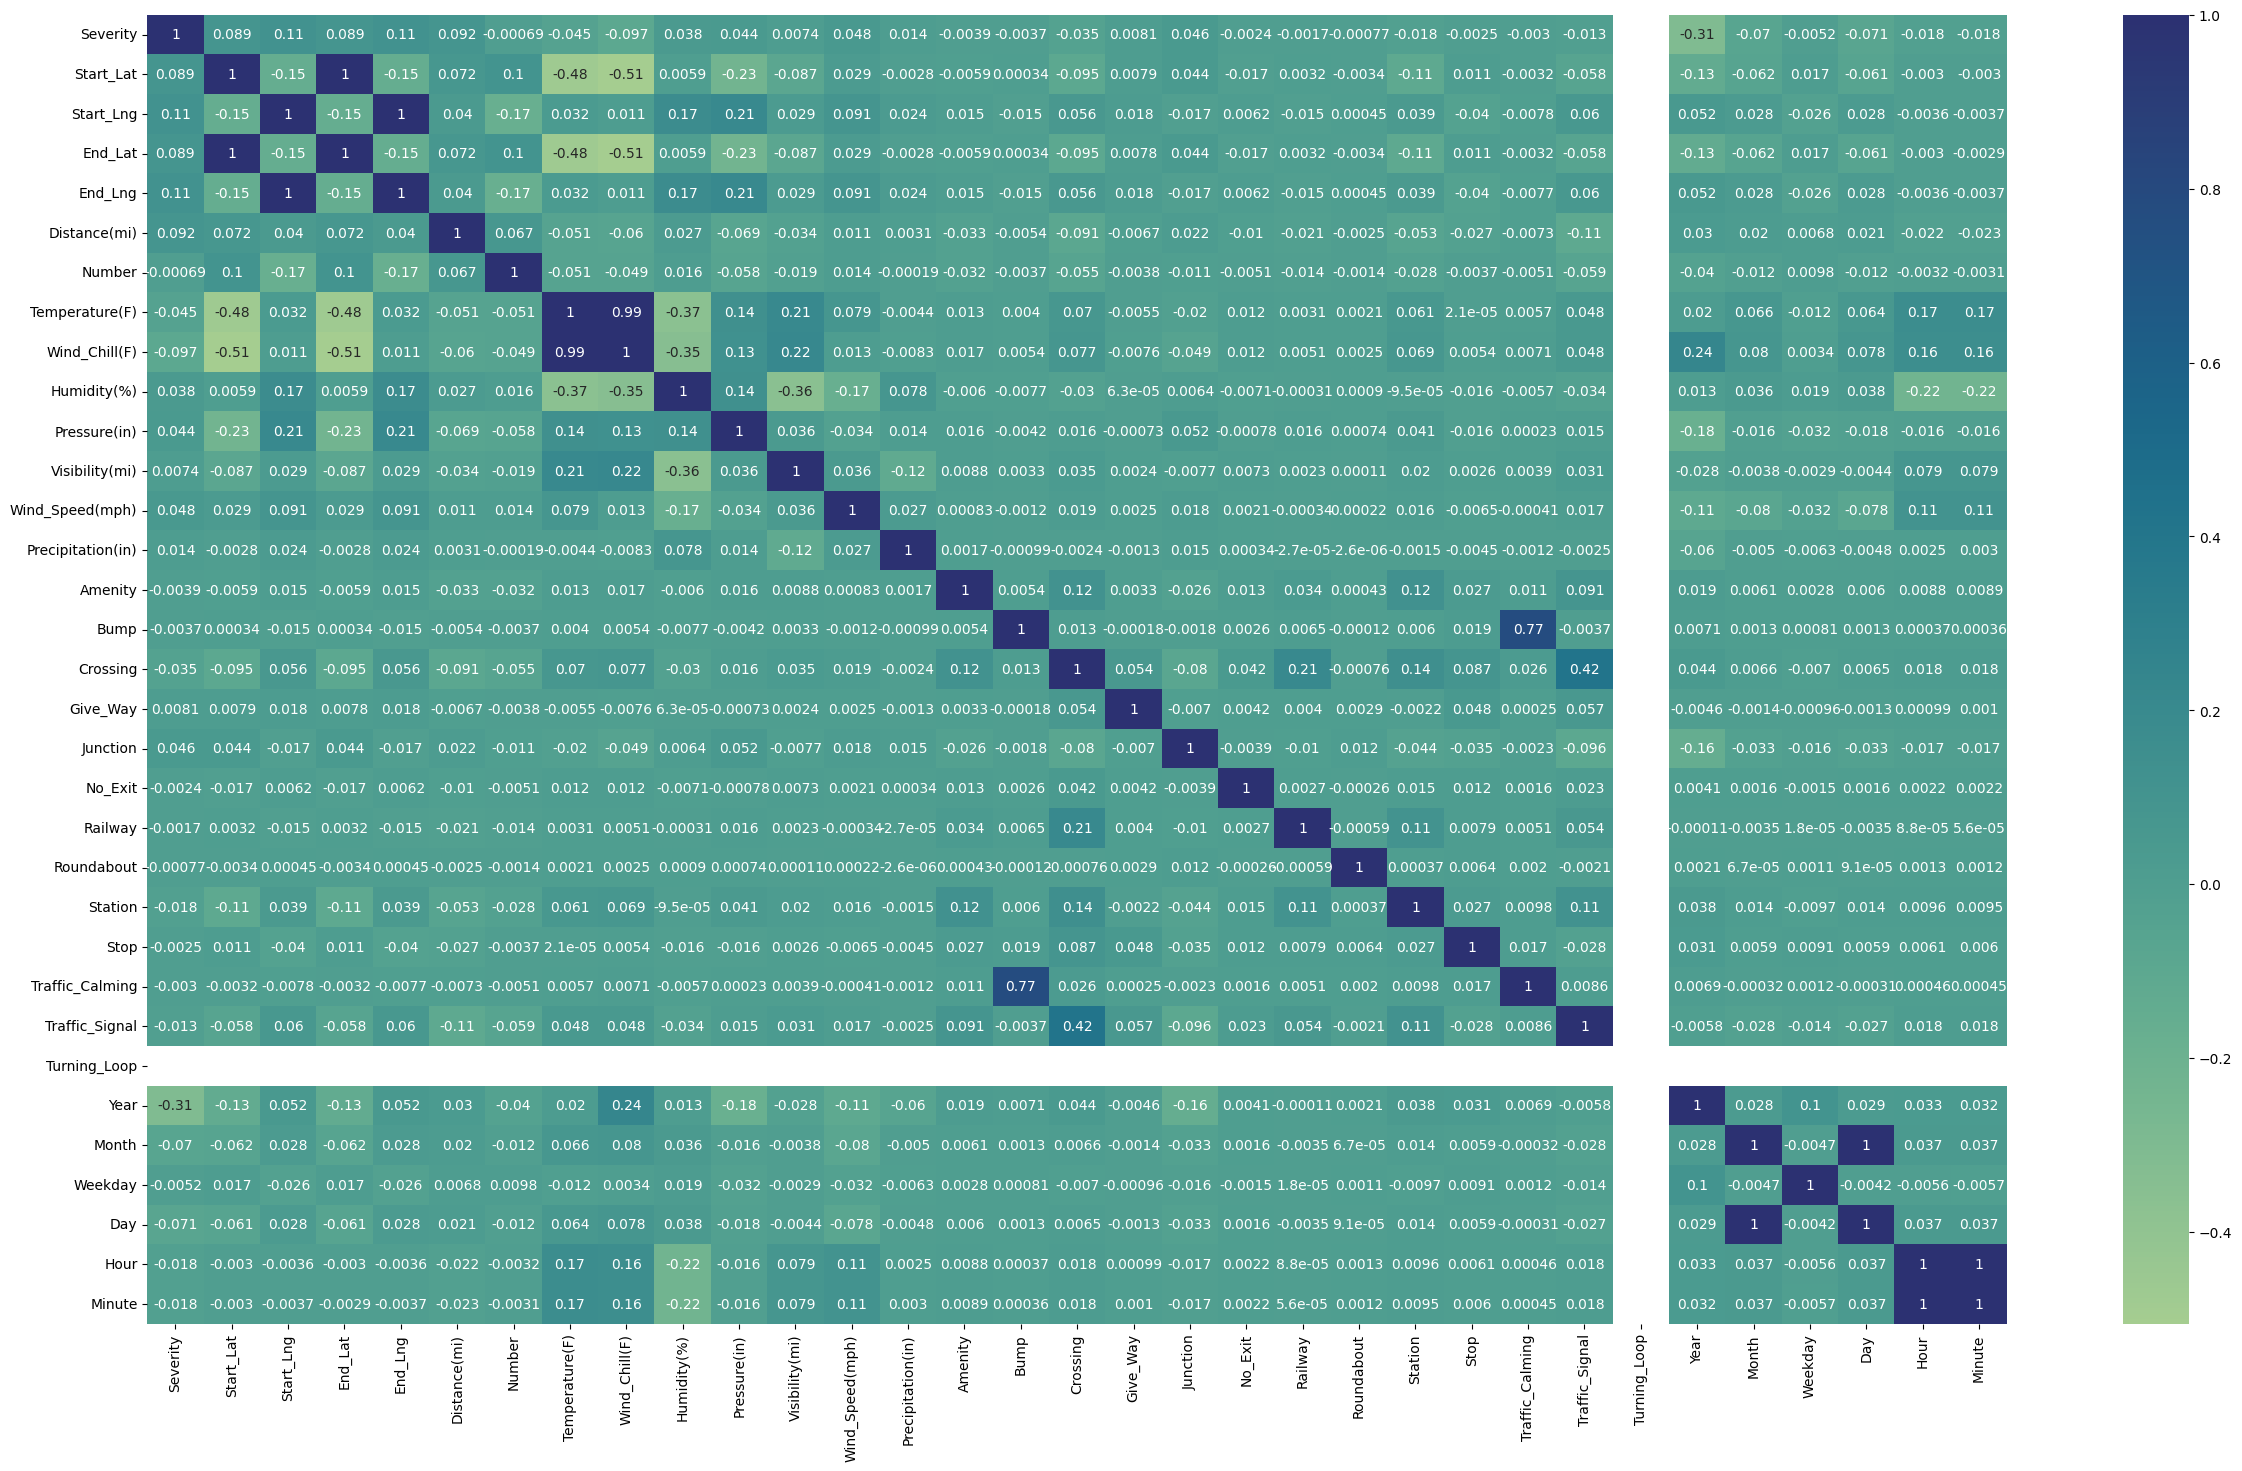

In [ ]:
plt.figure(figsize = (30,17))
sns.heatmap(raw_data.corr(),cmap="crest", annot = True)
plt.show()

In [13]:
raw_data = raw_data.drop(['Wind_Chill(F)','ID','Start_Time','End_Time','End_Lat','End_Lng','Description','Number','Street','Side','County','State','Zipcode','Country','Timezone','Airport_Code','Weather_Timestamp','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight','Wind_Direction','Amenity','Bump','Give_Way','No_Exit','Railway','Roundabout','Traffic_Calming','Turning_Loop'], axis = 1)
raw_data.head()

Severity  Start_Lat  Start_Lng  Distance(mi)        City  Temperature(F)  \
0         3  40.108910 -83.092860         3.230      Dublin            42.1   
1         2  39.865420 -84.062800         0.747      Dayton            36.9   
2         2  39.102660 -84.524680         0.055  Cincinnati            36.0   
3         2  41.062130 -81.537840         0.123       Akron            39.0   
4         3  39.172393 -84.492792         0.500  Cincinnati            37.0   

   Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  ...  Junction  \
0         58.0         29.76            10.0             10.4  ...     False   
1         91.0         29.68            10.0              NaN  ...     False   
2         97.0         29.70            10.0              NaN  ...      True   
3         55.0         29.65            10.0              NaN  ...     False   
4         93.0         29.69            10.0             10.4  ...     False   

  Station   Stop  Traffic_Signal  Year  Month  Weekday  Day  Hour  Minute  
0   False  False           False  2016      2        0   39     0    37.0  
1   False  False           False  2016      2        0   39     5   356.0  
2   False  False           False  2016      2        0   39     6   375.0  
3   False  False           False  2016      2        0   39     6   411.0  
4   False  False           False  2016      2        0   39     7   473.0  

[5 rows x 23 columns]

In [14]:
raw_data[["Temperature(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]] = raw_data[["Temperature(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]].fillna(raw_data[["Temperature(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]].median())
raw_data.dropna(inplace = True)
raw_data.isna().sum()

Severity             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
City                 0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Crossing             0
Junction             0
Station              0
Stop                 0
Traffic_Signal       0
Year                 0
Month                0
Weekday              0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [10]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2774575 entries, 0 to 2845341
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Start_Lat          float64
 2   Start_Lng          float64
 3   Distance(mi)       float64
 4   City               object 
 5   Temperature(F)     float64
 6   Humidity(%)        float64
 7   Pressure(in)       float64
 8   Visibility(mi)     float64
 9   Wind_Speed(mph)    float64
 10  Precipitation(in)  float64
 11  Weather_Condition  object 
 12  Crossing           bool   
 13  Junction           bool   
 14  Station            bool   
 15  Stop               bool   
 16  Traffic_Signal     bool   
 17  Year               int64  
 18  Month              int64  
 19  Weekday            int64  
 20  Day                int64  
 21  Hour               int64  
 22  Minute             float64
dtypes: bool(5), float64(10), int64(6), object(2)
memory usage: 415.4+ MB


In [15]:
LE = preprocessing.LabelEncoder()
raw_data['City'] = LE.fit_transform(raw_data['City'])
raw_data['Weather_Condition'] = LE.fit_transform(raw_data['Weather_Condition'])
raw_data = raw_data.replace([True, False], [1, 0])

In [16]:
scaler = MinMaxScaler()
features = ['Temperature(F)','Humidity(%)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Start_Lng','Start_Lat','Year', 'Month','Weekday','Day','Hour','Minute']
raw_data[features] = scaler.fit_transform(raw_data[features])
raw_data.head()

Severity  Start_Lat  Start_Lng  Distance(mi)  City  Temperature(F)  \
0         3   0.636103   0.721777         3.230  2726        0.460000   
1         2   0.626138   0.704890         0.747  2457        0.441754   
2         2   0.594921   0.696848         0.055  1846        0.438596   
3         2   0.675114   0.748852         0.123    68        0.449123   
4         3   0.597775   0.697403         0.500  1846        0.442105   

   Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  ...  Junction  \
0     0.575758         29.76        0.071429         0.009568  ...         0   
1     0.909091         29.68        0.071429         0.006440  ...         0   
2     0.969697         29.70        0.071429         0.006440  ...         1   
3     0.545455         29.65        0.071429         0.006440  ...         0   
4     0.929293         29.69        0.071429         0.009568  ...         0   

   Station  Stop  Traffic_Signal  Year     Month  Weekday       Day      Hour  \
0        0     0               0   0.0  0.090909      0.0  0.104396  0.000000   
1        0     0               0   0.0  0.090909      0.0  0.104396  0.217391   
2        0     0               0   0.0  0.090909      0.0  0.104396  0.260870   
3        0     0               0   0.0  0.090909      0.0  0.104396  0.260870   
4        0     0               0   0.0  0.090909      0.0  0.104396  0.304348   

     Minute  
0  0.025712  
1  0.247394  
2  0.260598  
3  0.285615  
4  0.328700  

[5 rows x 23 columns]

In [17]:
raw_data.drop_duplicates(inplace = True)

In [18]:
print("The final shape of the data : ",raw_data.shape)
print(" The no of columns in the data are : ", raw_data.shape[1])
print("The no pf datapoints in the data are : ", raw_data.shape[0])

The final shape of the data :  (2579875, 23)
 The no of columns in the data are :  23
The no pf datapoints in the data are :  2579875


#**RESAMPLING OUR DATA**

In [16]:
raw_data['Severity'].value_counts()

2    2280698
3     149320
4     125116
1      24741
Name: Severity, dtype: int64

In [19]:
#WE DO UNDERSAMPLING FOR OUR DATASET AS OUR DATASET IS HIGH AND OUR MAJORITY CLASS IN SEVERITY IS OVERLY POPULATED WE FOLLOW UNDERSAMPLING
X = raw_data.drop(['Severity'], axis = 1)
Y = raw_data['Severity']

rus = RandomUnderSampler(random_state = 18)
X_final,Y_final = rus.fit_resample(X,Y)

#**PIPELINE FOR SEVERITY PREDICTION**

In [20]:
X_train, X_temp,Y_train, Y_temp = train_test_split(X_final, Y_final, train_size = 0.70, random_state = 18)
X_valid, X_test,Y_valid, Y_test = train_test_split(X_temp, Y_temp, train_size = 2/3, random_state = 18)

#Random Forest Classifier

In [22]:
RFC = RandomForestClassifier()
RFC.fit(X_train, Y_train)
Y_pred = RFC.predict(X_test)
Y_val_pred = RFC.predict(X_valid)

print (classification_report(Y_test, Y_pred))
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy Score of test dataset is : ",acc * 100, "%")
acc_val = accuracy_score(Y_valid, Y_val_pred)
print("Accuracy Score for valid dataset is : ", acc_val * 100, "%")

              precision    recall  f1-score   support

           1       0.90      0.96      0.93      2507
           2       0.81      0.77      0.79      2464
           3       0.68      0.74      0.71      2480
           4       0.70      0.62      0.66      2446

    accuracy                           0.78      9897
   macro avg       0.77      0.78      0.77      9897
weighted avg       0.77      0.78      0.77      9897

Accuracy Score of test dataset is :  77.62958472264323 %
Accuracy Score for valid dataset is :  76.96155206386096 %


#Logistic Regression

In [23]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)
Y_pred = LR.predict(X_test)
Y_val_pred = LR.predict(X_valid)

print (classification_report(Y_test, Y_pred))
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy Score of test dataset is : ",acc * 100, "%")
acc_val = accuracy_score(Y_valid, Y_val_pred)
print("Accuracy Score for valid dataset is : ", acc_val * 100, "%")

              precision    recall  f1-score   support

           1       0.40      0.57      0.47      2507
           2       0.40      0.09      0.15      2464
           3       0.33      0.57      0.42      2480
           4       0.44      0.26      0.33      2446

    accuracy                           0.37      9897
   macro avg       0.39      0.37      0.34      9897
weighted avg       0.39      0.37      0.34      9897

Accuracy Score of test dataset is :  37.32444175002526 %
Accuracy Score for valid dataset is :  36.108725306926694 %


#K-Nearest Neighbors Algorithm

In [25]:
param_grid = {'n_neighbors': [1,2,3,4,5,6], 'weights': ['uniform', 'distance']}
Knn = KNeighborsClassifier()
grid_search = GridSearchCV(Knn, param_grid, cv=5)
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
KNN = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])
KNN.fit(X_train, Y_train)
Y_pred = KNN.predict(X_test)
Y_val_pred = KNN.predict(X_valid)

print (classification_report(Y_test, Y_pred))
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy Score of test dataset is : ",acc * 100, "%")
acc_val = accuracy_score(Y_valid, Y_val_pred)
print("Accuracy Score for valid dataset is : ", acc_val * 100, "%")

              precision    recall  f1-score   support

           1       0.73      0.85      0.79      2507
           2       0.60      0.54      0.57      2464
           3       0.54      0.58      0.56      2480
           4       0.53      0.45      0.49      2446

    accuracy                           0.61      9897
   macro avg       0.60      0.61      0.60      9897
weighted avg       0.60      0.61      0.60      9897

Accuracy Score of test dataset is :  60.73557643730423 %
Accuracy Score for valid dataset is :  60.34456626079927 %


#Gradient Boosting Classifier

In [26]:
GB = GradientBoostingClassifier()
GB.fit(X_train, Y_train)
Y_pred = GB.predict(X_test)
Y_val_pred = GB.predict(X_valid)

print (classification_report(Y_test, Y_pred))
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy Score of test dataset is : ",acc * 100, "%")
acc_val = accuracy_score(Y_valid, Y_val_pred)
print("Accuracy Score for valid dataset is : ", acc_val * 100, "%")

              precision    recall  f1-score   support

           1       0.87      0.95      0.91      2507
           2       0.77      0.76      0.77      2464
           3       0.64      0.67      0.66      2480
           4       0.63      0.56      0.59      2446

    accuracy                           0.73      9897
   macro avg       0.73      0.73      0.73      9897
weighted avg       0.73      0.73      0.73      9897

Accuracy Score of test dataset is :  73.48691522683642 %
Accuracy Score for valid dataset is :  73.5664123680089 %


#Decision Tree Classifier

In [28]:
clf_base = DecisionTreeClassifier()
grid = {'max_depth': [1,2,3,4,5],
        'min_samples_split': [2,4,6,8,10,12]}
clf_dtc = GridSearchCV(clf_base, grid, cv=5, n_jobs=8, scoring='f1_macro')
clf_dtc.fit(X_train, Y_train)
Y_pred = clf_dtc.predict(X_test)
Y_val_pred = clf_dtc.predict(X_valid)

print (classification_report(Y_test, Y_pred))
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy Score of test dataset is : ",acc * 100, "%")
acc_val = accuracy_score(Y_valid, Y_val_pred)
print("Accuracy Score for valid dataset is : ", acc_val * 100, "%")

              precision    recall  f1-score   support

           1       0.77      0.94      0.85      2507
           2       0.78      0.74      0.76      2464
           3       0.62      0.49      0.55      2480
           4       0.54      0.56      0.55      2446

    accuracy                           0.69      9897
   macro avg       0.68      0.68      0.68      9897
weighted avg       0.68      0.69      0.68      9897

Accuracy Score of test dataset is :  68.53591997575023 %
Accuracy Score for valid dataset is :  68.03415348860709 %


#Multi Level Perceptron

In [31]:
MLP = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1000)
MLP.fit(X_train, Y_train)
Y_pred = MLP.predict(X_test)
Y_val_pred = MLP.predict(X_valid)

print (classification_report(Y_test, Y_pred))
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy Score of test dataset is : ",acc * 100, "%")
acc_val = accuracy_score(Y_valid, Y_val_pred)
print("Accuracy Score for valid dataset is : ", acc_val * 100, "%")

              precision    recall  f1-score   support

           1       0.66      0.91      0.76      2507
           2       0.76      0.51      0.61      2464
           3       0.58      0.49      0.53      2480
           4       0.51      0.55      0.53      2446

    accuracy                           0.62      9897
   macro avg       0.63      0.62      0.61      9897
weighted avg       0.63      0.62      0.61      9897

Accuracy Score of test dataset is :  61.79650399110842 %
Accuracy Score for valid dataset is :  61.233769514474815 %


#**APPLYING LDA ON OUR DATASET**

In [34]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_final, Y_final)

X_train_new, X_temp_new,Y_train_new, Y_temp_new = train_test_split(X_final, Y_final, train_size = 0.70, random_state = 42)
X_valid_new, X_test_new,Y_valid_new, Y_test_new = train_test_split(X_temp_new, Y_temp_new, train_size = 2/3, random_state = 42)

In [35]:
print("The shape of our data before applying LDA is : ", X_final.shape)
print("The shape of  our data after applying LDA is : ", X_train.shape)

The shape of our data before applying LDA is :  (98964, 22)
The shape of  our data after applying LDA is :  (69274, 22)


#We observe even after observing LDA we observe no reduction in features so we expect the LDA Data to run as other Classifiers

#Random Forest Classifier

In [38]:
RFC = RandomForestClassifier()
RFC.fit(X_train_new, Y_train_new)
Y_pred = RFC.predict(X_test_new)
Y_val_pred = RFC.predict(X_valid_new)

print (classification_report(Y_test_new, Y_pred))
acc = accuracy_score(Y_test_new, Y_pred)
print("Accuracy Score of test dataset is : ",acc * 100, "%")
acc_val = accuracy_score(Y_valid_new, Y_val_pred)
print("Accuracy Score for valid dataset is : ", acc_val * 100, "%")

              precision    recall  f1-score   support

           1       0.90      0.96      0.93      2481
           2       0.82      0.77      0.79      2528
           3       0.68      0.73      0.70      2434
           4       0.70      0.64      0.67      2454

    accuracy                           0.77      9897
   macro avg       0.77      0.77      0.77      9897
weighted avg       0.77      0.77      0.77      9897

Accuracy Score of test dataset is :  77.37698292411842 %
Accuracy Score for valid dataset is :  77.17374829485172 %


#Logistic Regression

In [40]:
LR = LogisticRegression()
LR.fit(X_train_new, Y_train_new)
Y_pred = LR.predict(X_test_new)
Y_val_pred = LR.predict(X_valid_new)

print (classification_report(Y_test, Y_pred))
acc = accuracy_score(Y_test_new, Y_pred)
print("Accuracy Score of test dataset is : ",acc * 100, "%")
acc_val = accuracy_score(Y_valid_new, Y_val_pred)
print("Accuracy Score for valid dataset is : ", acc_val * 100, "%")

              precision    recall  f1-score   support

           1       0.26      0.30      0.28      2507
           2       0.25      0.33      0.28      2464
           3       0.24      0.32      0.28      2480
           4       0.21      0.04      0.07      2446

    accuracy                           0.25      9897
   macro avg       0.24      0.25      0.23      9897
weighted avg       0.24      0.25      0.23      9897

Accuracy Score of test dataset is :  34.85904819642316 %
Accuracy Score for valid dataset is :  34.067599656444195 %


#K-Nearest Neighbors Algorithm

In [41]:
param_grid = {'n_neighbors': [1,2,3,4,5,6], 'weights': ['uniform', 'distance']}
Knn = KNeighborsClassifier()
grid_search = GridSearchCV(Knn, param_grid, cv=5)
grid_search.fit(X_train_new, Y_train_new)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
KNN = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])
KNN.fit(X_train_new, Y_train_new)
Y_pred = KNN.predict(X_test_new)
Y_val_pred = KNN.predict(X_valid_new)

print (classification_report(Y_test_new, Y_pred))
acc = accuracy_score(Y_test_new, Y_pred)
print("Accuracy Score of test dataset is : ",acc * 100, "%")
acc_val = accuracy_score(Y_valid_new, Y_val_pred)
print("Accuracy Score for valid dataset is : ", acc_val * 100, "%")

              precision    recall  f1-score   support

           1       0.72      0.83      0.77      2481
           2       0.59      0.51      0.55      2528
           3       0.53      0.58      0.55      2434
           4       0.52      0.46      0.49      2454

    accuracy                           0.60      9897
   macro avg       0.59      0.60      0.59      9897
weighted avg       0.59      0.60      0.59      9897

Accuracy Score of test dataset is :  59.56350409214913 %
Accuracy Score for valid dataset is :  59.8999646339615 %


#Gradient Boosting Algorithm

In [66]:
GB = GradientBoostingClassifier()
GB.fit(X_train_new, Y_train_new)
Y_pred = GB.predict(X_test_new)
Y_val_pred = GB.predict(X_valid_new)

print (classification_report(Y_test_new, Y_pred))
acc = accuracy_score(Y_test_new, Y_pred)
print("Accuracy Score of test dataset is : ",acc * 100, "%")
acc_val = accuracy_score(Y_valid_new, Y_val_pred)
print("Accuracy Score for valid dataset is : ", acc_val * 100, "%")

              precision    recall  f1-score   support

           1       0.86      0.95      0.90      2481
           2       0.79      0.75      0.77      2528
           3       0.63      0.66      0.65      2434
           4       0.65      0.59      0.62      2454

    accuracy                           0.74      9897
   macro avg       0.74      0.74      0.74      9897
weighted avg       0.74      0.74      0.74      9897

Accuracy Score of test dataset is :  73.94159846418107 %
Accuracy Score for valid dataset is :  73.49568029101198 %


#Decision Tree Classifier

In [39]:
clf_base = DecisionTreeClassifier()
grid = {'max_depth': [1,2,3,4,5],
        'min_samples_split': [2,4,6,8,10,12]}
clf_dtc = GridSearchCV(clf_base, grid, cv=5, n_jobs=8, scoring='f1_macro')
clf_dtc.fit(X_train_new, Y_train_new)
Y_pred = clf_dtc.predict(X_test_new)
Y_val_pred = clf_dtc.predict(X_valid_new)

print (classification_report(Y_test_new, Y_pred))
acc = accuracy_score(Y_test_new, Y_pred)
print("Accuracy Score of test dataset is : ",acc * 100, "%")
acc_val = accuracy_score(Y_valid_new, Y_val_pred)
print("Accuracy Score for valid dataset is : ", acc_val * 100, "%")

              precision    recall  f1-score   support

           1       0.77      0.95      0.85      2481
           2       0.79      0.74      0.76      2528
           3       0.60      0.48      0.54      2434
           4       0.56      0.57      0.57      2454

    accuracy                           0.69      9897
   macro avg       0.68      0.69      0.68      9897
weighted avg       0.68      0.69      0.68      9897

Accuracy Score of test dataset is :  68.67737698292412 %
Accuracy Score for valid dataset is :  68.07962410953368 %


#Multi-Level perceptron

In [43]:
MLP = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1000)
MLP.fit(X_train, Y_train)
Y_pred = MLP.predict(X_test)
Y_val_pred = MLP.predict(X_valid)

print (classification_report(Y_test, Y_pred))
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy Score of test dataset is : ",acc * 100, "%")
acc_val = accuracy_score(Y_valid, Y_val_pred)
print("Accuracy Score for valid dataset is : ", acc_val * 100, "%")

              precision    recall  f1-score   support

           1       0.73      0.82      0.77      2507
           2       0.54      0.71      0.61      2464
           3       0.55      0.50      0.52      2480
           4       0.56      0.36      0.44      2446

    accuracy                           0.60      9897
   macro avg       0.59      0.60      0.59      9897
weighted avg       0.59      0.60      0.59      9897

Accuracy Score of test dataset is :  59.84641810649693 %
Accuracy Score for valid dataset is :  59.85449401303491 %


#**PIPELINE FOR LOCATION PREDICTION**

In [44]:
raw_data_1 = raw_data
raw_data_1.head()

Severity  Start_Lat  Start_Lng  Distance(mi)  City  Temperature(F)  \
0         3   0.636103   0.721777         3.230  2726        0.460000   
1         2   0.626138   0.704890         0.747  2457        0.441754   
2         2   0.594921   0.696848         0.055  1846        0.438596   
3         2   0.675114   0.748852         0.123    68        0.449123   
4         3   0.597775   0.697403         0.500  1846        0.442105   

   Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  ...  Junction  \
0     0.575758         29.76        0.071429         0.009568  ...         0   
1     0.909091         29.68        0.071429         0.006440  ...         0   
2     0.969697         29.70        0.071429         0.006440  ...         1   
3     0.545455         29.65        0.071429         0.006440  ...         0   
4     0.929293         29.69        0.071429         0.009568  ...         0   

   Station  Stop  Traffic_Signal  Year     Month  Weekday       Day      Hour  \
0        0     0               0   0.0  0.090909      0.0  0.104396  0.000000   
1        0     0               0   0.0  0.090909      0.0  0.104396  0.217391   
2        0     0               0   0.0  0.090909      0.0  0.104396  0.260870   
3        0     0               0   0.0  0.090909      0.0  0.104396  0.260870   
4        0     0               0   0.0  0.090909      0.0  0.104396  0.304348   

     Minute  
0  0.025712  
1  0.247394  
2  0.260598  
3  0.285615  
4  0.328700  

[5 rows x 23 columns]

In [45]:
state_mapping = {'WA': 'Western', 'OR': 'Western', 'ID': 'Western', 'CA': 'Western', 'NV': 'Western', 'UT': 'Western', 'AZ': 'Western', 'MT': 'Western', 'WY': 'Western', 'CO': 'Western', 'NM': 'Western', 'TX': 'Southern', 'OK': 'Southern', 'KS': 'Midwestern', 'NE': 'Midwestern', 'ND': 'Midwestern', 'SD': 'Midwestern', 'MN': 'Midwestern', 'IA': 'Midwestern', 'MO': 'Midwestern', 'AR': 'Southern', 'LA': 'Southern', 'IL': 'Midwestern', 'WI': 'Midwestern', 'MI': 'Midwestern', 'IN': 'Midwestern', 'OH': 'Midwestern', 'KY': 'Midwestern', 'TN': 'Southern', 'MS': 'Southern', 'AL': 'Southern', 'GA': 'Southern', 'WV': 'Midwestern', 'PA': 'Northeastern', 'NY': 'Northeastern', 'FL': 'Southern', 'NC': 'Southern', 'SC': 'Southern', 'NJ': 'Northeastern', 'CT': 'Northeastern', 'MA': 'Northeastern', 'RI': 'Northeastern', 'NH': 'Northeastern', 'DE': 'Northeastern', 'MD': 'Northeastern', 'DC': 'Northeastern','VA' : 'Northeastern', 'ME' : 'Northeastern', 'VT' : 'Northeastern'}
# Replace the old classes with the new classes
raw_data_1['Location'] = state_var.replace(state_mapping)
raw_data_1.head()

Severity  Start_Lat  Start_Lng  Distance(mi)  City  Temperature(F)  \
0         3   0.636103   0.721777         3.230  2726        0.460000   
1         2   0.626138   0.704890         0.747  2457        0.441754   
2         2   0.594921   0.696848         0.055  1846        0.438596   
3         2   0.675114   0.748852         0.123    68        0.449123   
4         3   0.597775   0.697403         0.500  1846        0.442105   

   Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  ...  Station  \
0     0.575758         29.76        0.071429         0.009568  ...        0   
1     0.909091         29.68        0.071429         0.006440  ...        0   
2     0.969697         29.70        0.071429         0.006440  ...        0   
3     0.545455         29.65        0.071429         0.006440  ...        0   
4     0.929293         29.69        0.071429         0.009568  ...        0   

   Stop  Traffic_Signal  Year     Month  Weekday       Day      Hour  \
0     0               0   0.0  0.090909      0.0  0.104396  0.000000   
1     0               0   0.0  0.090909      0.0  0.104396  0.217391   
2     0               0   0.0  0.090909      0.0  0.104396  0.260870   
3     0               0   0.0  0.090909      0.0  0.104396  0.260870   
4     0               0   0.0  0.090909      0.0  0.104396  0.304348   

     Minute    Location  
0  0.025712  Midwestern  
1  0.247394  Midwestern  
2  0.260598  Midwestern  
3  0.285615  Midwestern  
4  0.328700  Midwestern  

[5 rows x 24 columns]

In [49]:
count = 0
for i in raw_data_1['Location'].value_counts().values:
  print("The percentage for",raw_data_1['Location'].value_counts().index[count],"province of the states : ",(i * 100)/len(raw_data_1),"%")
  count = count + 1

raw_data_1['Location'].value_counts()

The percentage for Western province of the states :  39.73591743786036 %
The percentage for Southern province of the states :  32.07686418915645 %
The percentage for Northeastern province of the states :  16.81158970880372 %
The percentage for Midwestern province of the states :  11.375628664179466 %


Western         1025137
Southern         827543
Northeastern     433718
Midwestern       293477
Name: Location, dtype: int64

In [50]:
LE = preprocessing.LabelEncoder()
raw_data_1['Location'] = LE.fit_transform(raw_data_1['Location'])

In [51]:
X_1 = raw_data_1.drop(['Location'], axis = 1)
Y_1 = raw_data_1['Location']
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_1, Y_1)
X_train_1, X_temp_1,Y_train_1, Y_temp_1 = train_test_split(X_lda, Y_1, train_size = 0.70, random_state = 18)
X_valid_1, X_test_1,Y_valid_1, Y_test_1 = train_test_split(X_temp_1, Y_temp_1, train_size = 2/3, random_state = 18)

In [55]:
print("The shape of the data before applying LDA is : ",X_1.shape)
print("The shape of the data after applying LDA is : ",X_lda.shape)

The shape of the data before applying LDA is :  (2579875, 23)
The shape of the data after applying LDA is :  (2579875, 3)


#Here we see the features are reduced so we expect the models to give more efficient results

#Random Forest Classifier

In [65]:
clf_RFC = RandomForestClassifier()
clf_RFC.fit(X_train_1, Y_train_1)
Y_pred = clf_RFC.predict(X_test_1)
Y_val_pred = clf_RFC.predict(X_valid_1)

print (classification_report(Y_test_1, Y_pred))
acc = accuracy_score(Y_test_1, Y_pred)
print("Accuracy Score of test dataset is : ",acc * 100, "%")
acc_val = accuracy_score(Y_valid_1, Y_val_pred)
print("Accuracy Score for valid dataset is : ", acc_val * 100, "%")

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     29462
           1       0.98      0.98      0.98     43378
           2       0.99      0.99      0.99     82680
           3       1.00      1.00      1.00    102468

    accuracy                           0.99    257988
   macro avg       0.99      0.99      0.99    257988
weighted avg       0.99      0.99      0.99    257988

Accuracy Score of test dataset is :  99.17515543358606 %
Accuracy Score for valid dataset is :  99.17205290954018 %


#Logistic Regression

In [53]:
LR = LogisticRegression()
LR.fit(X_train_1, Y_train_1)
Y_pred = LR.predict(X_test_1)
Y_val_pred = LR.predict(X_valid_1)

print (classification_report(Y_test_1, Y_pred))
acc = accuracy_score(Y_test_1, Y_pred)
print("Accuracy Score of test dataset is : ",acc * 100, "%")
acc_val = accuracy_score(Y_valid_1, Y_val_pred)
print("Accuracy Score for valid dataset is : ", acc_val * 100, "%")

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     29462
           1       0.98      0.98      0.98     43378
           2       0.98      0.99      0.99     82680
           3       1.00      1.00      1.00    102468

    accuracy                           0.99    257988
   macro avg       0.98      0.98      0.98    257988
weighted avg       0.99      0.99      0.99    257988

Accuracy Score of test dataset is :  98.82320107911995 %
Accuracy Score for valid dataset is :  98.78521246184408 %


#K-Nearest neighbors Algorithm

In [63]:
KNN = KNeighborsClassifier()
KNN.fit(X_train_1, Y_train_1)
Y_pred = KNN.predict(X_test_1)
Y_val_pred = KNN.predict(X_valid_1)

print (classification_report(Y_test_1, Y_pred))
acc = accuracy_score(Y_test_1, Y_pred)
print("Accuracy Score of test dataset is : ",acc * 100, "%")
acc_val = accuracy_score(Y_valid_1, Y_val_pred)
print("Accuracy Score for valid dataset is : ", acc_val * 100, "%")

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     29462
           1       0.98      0.98      0.98     43378
           2       0.99      0.99      0.99     82680
           3       1.00      1.00      1.00    102468

    accuracy                           0.99    257988
   macro avg       0.99      0.99      0.99    257988
weighted avg       0.99      0.99      0.99    257988

Accuracy Score of test dataset is :  99.0317379102904 %
Accuracy Score for valid dataset is :  99.0484035079219 %


#Gradient Boosting Classifier

In [54]:
GB = GradientBoostingClassifier()
GB.fit(X_train_1, Y_train_1)
Y_pred = GB.predict(X_test_1)
Y_val_pred = GB.predict(X_valid_1)

print (classification_report(Y_test_1, Y_pred))
acc = accuracy_score(Y_test_1, Y_pred)
print("Accuracy Score of test dataset is : ",acc * 100, "%")
acc_val = accuracy_score(Y_valid_1, Y_val_pred)
print("Accuracy Score for valid dataset is : ", acc_val * 100, "%")

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     29462
           1       0.98      0.98      0.98     43378
           2       0.99      0.99      0.99     82680
           3       1.00      1.00      1.00    102468

    accuracy                           0.99    257988
   macro avg       0.99      0.99      0.99    257988
weighted avg       0.99      0.99      0.99    257988

Accuracy Score of test dataset is :  99.08367831061909 %
Accuracy Score for valid dataset is :  99.04685304520568 %


#Decision Tree Classifier

In [58]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train_1, Y_train_1)
Y_pred = DTC.predict(X_test_1)
Y_val_pred = DTC.predict(X_valid_1)

print (classification_report(Y_test_1, Y_pred))
acc = accuracy_score(Y_test_1, Y_pred)
print("Accuracy Score of test dataset is : ",acc * 100, "%")
acc_val = accuracy_score(Y_valid_1, Y_val_pred)
print("Accuracy Score for valid dataset is : ", acc_val * 100, "%")

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     29462
           1       0.97      0.97      0.97     43378
           2       0.99      0.99      0.99     82680
           3       1.00      1.00      1.00    102468

    accuracy                           0.99    257988
   macro avg       0.98      0.98      0.98    257988
weighted avg       0.99      0.99      0.99    257988

Accuracy Score of test dataset is :  98.80963455664605 %
Accuracy Score for valid dataset is :  98.78928242647414 %


#Multi-Level Perceptron

In [59]:
MLP = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1000)
MLP.fit(X_train_1, Y_train_1)
Y_pred = MLP.predict(X_test_1)
Y_val_pred = MLP.predict(X_valid_1)

print (classification_report(Y_test_1, Y_pred))
acc = accuracy_score(Y_test_1, Y_pred)
print("Accuracy Score of test dataset is : ",acc * 100, "%")
acc_val = accuracy_score(Y_valid_1, Y_val_pred)
print("Accuracy Score for valid dataset is : ", acc_val * 100, "%")

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     29462
           1       0.98      0.97      0.98     43378
           2       0.99      0.99      0.99     82680
           3       1.00      1.00      1.00    102468

    accuracy                           0.99    257988
   macro avg       0.99      0.99      0.99    257988
weighted avg       0.99      0.99      0.99    257988

Accuracy Score of test dataset is :  99.08251546583561 %
Accuracy Score for valid dataset is :  99.08173845632055 %
